# IMPORTATION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras
import tensorflow

# Feature scaling
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split

#ML classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.mixture import GaussianMixture

#Demension Reduction
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding

#Feature Selection
from sklearn.feature_selection import VarianceThreshold, SelectPercentile,f_classif

#Pipeline
from sklearn.pipeline import Pipeline, FeatureUnion

#Search for the best & Validation Curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, validation_curve

#score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

Mounted at /content/drive


In [ ]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

# Visulaze class

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SZ data/Major Psychiatric Disorders (Resting-State EEG using a ML)/catogircal_data_fillna.csv')
df = df.drop(['Unnamed: 0','no.','sex','education','IQ','specific.disorder','age'],axis=1)
df.head(5)

,main.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,Addictive disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,Addictive disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,14.834740,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,Addictive disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,21.686306,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,Addictive disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,11.015078,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,Addictive disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,Healthy control,41.851823,36.771496,43.671792,36.860889,24.732236,23.607823,23.288260,7.520642,17.636528,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,Healthy control,18.986856,19.401387,27.586436,20.194732,19.407491,20.216570,16.465027,13.178851,12.687296,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,Healthy control,28.781317,32.369230,11.717778,23.134370,26.209302,25.484497,22.586688,11.368466,21.799254,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,Healthy control,19.929100,25.196375,14.445391,16.453456,16.590649,16.007279,18.909188,13.438102,17.442777,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [ ]:
df['main.disorder'].value_counts()

Mood disorder                         266
Addictive disorder                    186
Trauma and stress related disorder    128
Schizophrenia                         117
Anxiety disorder                      107
Healthy control                        95
Obsessive compulsive disorder          46
Name: main.disorder, dtype: int64

In [ ]:
# tách ra thành từng bệnh
HC_df = (df['main.disorder']=='Healthy control')
SZ_df = (df['main.disorder']=='Schizophrenia')
M_df  = (df['main.disorder']=='Mood disorder')
Add_df= (df['main.disorder']=='Trauma and stress related disorder')
Ax_df = (df['main.disorder']=='Anxiety disorder')
OC_df = (df['main.disorder']=='Obsessive compulsive disorder')

# SZ vs BD vs D

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SZ data/Major Psychiatric Disorders (Resting-State EEG using a ML)/EEG.machinelearing_data_BRMH.csv')

# shuffle the DataFrame rows
df = df.sample(frac = 1)

In [ ]:
# tách ra thành từng bệnh
HC_df = (df['specific.disorder']=='Healthy control')
SZ_df = (df['specific.disorder']=='Schizophrenia')
BD_df = (df['specific.disorder']=='Bipolar disorder')
D_df  = (df['specific.disorder']=='Depressive disorder')

# replace with number
df['specific.disorder'].replace(['Healthy control', 'Schizophrenia', 'Depressive disorder', 'Bipolar disorder', 'Panic disorder', 'Social anxiety disorder',
                                     'Obsessive compulsitve disorder', 'Alcohol use disorder', 'Behavioral addiction disorder',
                                     'Posttraumatic stress disorder', 'Acute stress disorder', 'Adjustment disorder'],
                                    [0, 1,2,3,4,5,6,7,8,9,10,11], inplace=True)

# create BD, SZ and D dataframe
SZ_BD_D_df = df[ BD_df | SZ_df | D_df ]
print(SZ_BD_D_df['specific.disorder'].value_counts())
SZ_BD_D_df.head(2)

2    199
1    117
3     67
Name: specific.disorder, dtype: int64


,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
884,885,M,23.82,2011.7.14,16.0,105.0,Mood disorder,2,11.807564,13.441509,...,89.671976,47.143655,39.769642,43.124246,61.329517,28.004082,52.891264,6.075732,17.344787,24.399443
426,427,F,44.50,2013.3.27,16.0,112.0,Mood disorder,2,17.845899,17.381161,...,82.657200,50.454756,56.702785,72.242927,78.265235,50.588919,85.490663,31.474971,73.990155,55.771717


In [ ]:
from sklearn.model_selection import train_test_split

# create feature matrix and target vector
X = SZ_BD_D_df.drop(['main.disorder','no.','sex','age','education','IQ','eeg.date','specific.disorder'],axis=1)

y = SZ_BD_D_df['specific.disorder']

#from sklearn.preprocessing import LabelBinarizer
#y = LabelBinarizer().fit_transform(y) #convert target from nominal catogeriocal into one-hot-encoder
#from scipy import sparse
#y = sparse.csr_matrix(y)
print("shape of X",X.shape)
print("shape of y",y.shape)

# split into train & test set
print("-----------------------")
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1742, shuffle=True)
print("Shape of train and test sets:",X_train.shape,X_test.shape)
y

shape of X (383, 1140)
shape of y (383,)
-----------------------
Shape of train and test sets: (306, 1140) (77, 1140)


884    2
426    2
336    2
367    2
357    1
      ..
584    2
535    2
579    1
502    2
537    2
Name: specific.disorder, Length: 383, dtype: int64

# Model dict

In [ ]:
basedModels = {'LR' : LogisticRegression(multi_class='multinomial'),
               'LDA': LinearDiscriminantAnalysis(),
               'KNN': KNeighborsClassifier(),
               'DT' : DecisionTreeClassifier(),
               #'NB' : GaussianNB(),
               'SVM': SVC(decision_function_shape='ovr'),
               #'AB' : AdaBoostClassifier(),
               'GB' : GradientBoostingClassifier(),
               'RF' : RandomForestClassifier(),
               #'ET' : ExtraTreesClassifier()
               }

In [ ]:
# Feature Extraction
FE_dict =  {"pca" : PCA(n_components=0.99),
            "ica" : FastICA(n_components=200),
            "lle" : LocallyLinearEmbedding(n_components=200)}

# Feature Selection
FS_dict =  {'vt' : VarianceThreshold(threshold=80),
            'sp' : SelectPercentile(f_classif,percentile=80),
            #'fpr': SelectFpr(alpha=0.05)
            }

# Dictionary of Processors pipeline
std_FE_FS = {}
for FE_name, FE_algo in FE_dict.items():
  for FS_name, FS_algo in FS_dict.items():
    proprecsor = FeatureUnion([("std",StandardScaler()),
                               (FE_name,FE_algo),
                               (FS_name, FS_algo)])

    proprecsor_name = "std" + '_' + FE_name + '_' + FS_name

    std_FE_FS[proprecsor_name] = proprecsor

print(len(std_FE_FS))

6


In [ ]:
all_piplines={}
for classifier_name, classifier in basedModels.items():
      pipeline = Pipeline(steps=[("std",StandardScaler()),
                                 (classifier_name,classifier)])

      pipeline_name = "std" + '_' + classifier_name

      all_piplines[pipeline_name] = pipeline

      results_df = predictionReport(pipelines=all_piplines)

results_df.to_excel('A Complete ML Pipeline Tutorial.xlsx')

# Helper functions

In [ ]:
# lib for ROC curve of MULTIPLE CLASS
!pip install scikit-plot
import scikitplot as skplt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn import metrics

# Function for FIT and PREDICTION -> y_test and y_proba
def fit_predict(pipeline):
  """ Train the model. Predict y_test and y_prob"""
  """ Input: Pipeline. Output: y_pred & y_prob (for auc)"""
  pipeline.fit(X_train,y_train)          # Fit
  y_pred = pipeline.predict(X_test)      # Predict
  y_pred_proba = pipeline.predict_proba(X_test) # Predict Probability
  return y_pred,y_pred_proba

def results_of_model(y_test,y_pred):
  results = {} # dict { metric:value, ...}

  results["accuracy"]           = accuracy_score(y_test,y_pred)
  results["f1_score"]           = f1_score(y_test, y_pred, average='macro')
  #results["f1_score_weighted"] = f1_score(y_test, y_pred, average='weighted')
  results["precision_score"]    = precision_score(y_test, y_pred, average='macro')
  #results['precision_score_weighted'] = precision_score(y_test, y_pred, average='weighted')
  results['recall_score']       = recall_score(y_test, y_pred, average='macro')
  #results['recall_score_weighted'] = recall_score(y_test, y_pred, average='weighted')

  confusion = confusion_matrix(y_pred,y_test)

  results['recall for class 1']    = metrics.recall_score(y_test, y_pred, average=None, zero_division=1)[0]
  results['recall for class 2']    = metrics.recall_score(y_test, y_pred, average=None, zero_division=1)[1]
  results['recall for class 3']    = metrics.recall_score(y_test, y_pred, average=None, zero_division=1)[2]
  results['precision for class 1'] = metrics.precision_score(y_test, y_pred, average=None, zero_division=1)[0]
  results['precision for class 2'] = metrics.precision_score(y_test, y_pred, average=None, zero_division=1)[1]
  results['precision for class 3'] = metrics.precision_score(y_test, y_pred, average=None, zero_division=1)[2]

  return results

# Function for CONFUNSION MATRIX
## Function for calculate cf
def confunsion_matrix(y_pred):
  """ Calculate CF from y_pred and y_test """
  return confusion_matrix(y_test, y_pred)

## Function for plotting the calculated cf
def plotting_confunsion_matrix(cf_matrix):
  """ Plot the Confunsion matrix by SNS from the calculated CF.
      If use the plot_confusion_matrix function: we have to fit and predict again """
  df_df = pd.DataFrame(cf_matrix, range(3), range(3))
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(df_df, annot=True, annot_kws={"size": 16}) # font size
  plt.show()

def roc_auc_score_multiclass(y_pred, average = "macro"):
    actual_class = y_test; pred_class = y_pred
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:

        #creating a list of all the classes except the current class
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict


# Plot the ROC CURVE
# using the lib
def plotting_roc_curve(y_pred_proba):
  skplt.metrics.plot_roc_curve(y_test, y_pred_proba,
                               figsize=(10,10),title_fontsize='medium')
  plt.show()

def combination_measurement(pipeline):
  # fit and predict -> y_pred,y_pred_proba
  y_pred,y_pred_proba = fit_predict(pipeline)

  # classification results
  print("Classification Results:")
  print(classification_report(y_test,y_pred))

  results_df = results_of_model(y_test,y_pred)
  print(results_df)

  # Confusion matrix
  cf_matrix = confunsion_matrix(y_pred)  # calculate
  plotting_confunsion_matrix(cf_matrix)  # plot

  # ROC AUC
  print("ROC AUC score")
  print(roc_auc_score_multiclass(y_pred, average = "macro")) # SCORE
  plotting_roc_curve(y_pred_proba)                    # Plotting

In [ ]:
def predictionReport(pipelines):
  """
  Function to fit-predict and push a result table
  """
  acc_of_piplines = {} # empty dict to store the highest acc and the pipeline name pipe:acc
  results_of_piplines = {} #pipeline: [acc,precision,recall]
  i=0
  for pipeline_name, pipeline in pipelines.items():
        i=i+1

        # fit & predict
        pipeline.fit(X_train,y_train)
        y_pred = pipeline.predict(X_test)

        # save all results into a dict { name_of_pip : { 7 metrics : 7 values } }
        results_of_piplines[pipeline_name] = results_of_model(y_test,y_pred)

  # save results_of_piplines as a dataframe
  results_df = pd.DataFrame.from_dict(results_of_piplines)
  results_df = results_df.T
  return results_df

In [ ]:
from scipy.stats import uniform

# param dict for fine tuning
param_grids = {
    "LR" : { 'penalty' : [ 'l2', 'none'], 'C' : uniform(loc=0, scale=4)},
    "RF" : {'bootstrap': [True],
            #'criterion': ['gini', 'entropy', 'log_loss'],
            'max_depth': [20,25,30], 'n_estimators': [25,30,35],},
    "LDA": {'solver':['svd', 'lsqr', 'eigen']},
    "KNN": {'n_neighbors': [1,5,10,20],
            'weights' : ['uniform', 'distance'],
            'metric'  : ['euclidean', 'manhattan', 'minkowski']},
    "SVM": {'C': [0.1, 0.5, 1, 3, 5, 7, 10, 50, 100],
            'gamma': [1,0.1,0.01,0.001],
            'kernel': ['rbf', 'poly', 'sigmoid']},
    "GB" : {'learning_rate' : [.01,.05,.1,.5,1],
            'n_estimators' : [10,20,30,50,100,150,200]}
    }


In [ ]:
def grid_search(X_train,y_train,X_test,y_test,
                param_grids=param_grids, basedModels=basedModels,):
  results_df = {}
  for model_name, param_dict in param_grids.items():
    result = {}

    model = basedModels[model_name]
    Search = RandomizedSearchCV(model, param_dict)
    Search.fit(X_train,y_train)

    # best hyper
    best_hyper = Search.best_estimator_
    result['best hyper'] = best_hyper

    # predict
    y_pred = Search.predict(X_test)
    result['accuarcy'] = accuracy_score(y_test,y_pred)

    results_df[model_name]= (result)

  return pd.DataFrame.from_dict(results_df).T


# classify with normal data

In [ ]:
all_piplines={}
for classifier_name, classifier in basedModels.items():
      pipeline = Pipeline(steps=[("std",StandardScaler()),
                                 (classifier_name,classifier)])

      pipeline_name = "std" + '_' + classifier_name

      all_piplines[pipeline_name] = pipeline

      results_df = predictionReport(pipelines=all_piplines)

results_df.to_excel('basemodels with norm data.xlsx')
results_df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,accuracy,f1_score,precision_score,recall_score,recall for class 1,recall for class 2,recall for class 3,precision for class 1,precision for class 2,precision for class 3
std_LR,0.350649,0.278695,0.292159,0.286524,0.225806,0.542857,0.090909,0.388889,0.404255,0.083333
std_LDA,0.337662,0.273504,0.271024,0.294093,0.129032,0.571429,0.181818,0.235294,0.444444,0.133333
std_KNN,0.493506,0.396812,0.411905,0.401117,0.483871,0.628571,0.090909,0.535714,0.500000,0.200000
std_DT,0.493506,0.413911,0.419945,0.418210,0.387097,0.685714,0.181818,0.521739,0.571429,0.166667
std_SVM,0.454545,0.208333,0.151515,0.333333,0.000000,1.000000,0.000000,1.000000,0.454545,1.000000
std_GB,0.415584,0.230266,0.232587,0.307220,0.064516,0.857143,0.000000,0.250000,0.447761,0.000000
std_RF,0.454545,0.242645,0.286111,0.335791,0.064516,0.942857,0.000000,0.400000,0.458333,1.000000


In [ ]:
grid_search(X_train,y_train,X_test,y_test)

,best hyper,accuarcy
LR,"LogisticRegression(C=2.8901008598912896, multi...",0.402597
RF,"(DecisionTreeClassifier(max_depth=20, max_feat...",0.428571
LDA,LinearDiscriminantAnalysis(),0.337662
KNN,"KNeighborsClassifier(metric='manhattan', n_nei...",0.428571
SVM,"SVC(C=5, gamma=0.001, kernel='sigmoid')",0.454545
GB,([DecisionTreeRegressor(criterion='friedman_ms...,0.454545


# Handel imblance class SZ_BD_D

2    199
1    117
3     67
Name: specific.disorder, dtype: int64


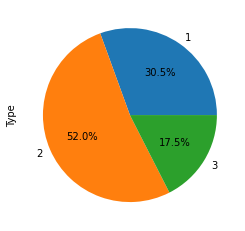

In [ ]:
print(SZ_BD_D_df['specific.disorder'].value_counts())

SZ_BD_D_df.groupby('specific.disorder').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')
# -> nhỏ tới lớn: 0,1,2

In [ ]:
## df[(condition)] -> tạo ra df mới theo từng class
class1_df = df[(df['specific.disorder']==1)]
class2_df = df[(df['specific.disorder']==2)]
class3_df = df[(df['specific.disorder']==3)]
print(class3_df.shape,class1_df.shape,class2_df.shape)

(67, 1148) (117, 1148) (199, 1148)


## Downsampling with sklearn

(117, 1148) (117, 1148)
2    117
3    117
1    117
Name: specific.disorder, dtype: int64


<Axes: ylabel='Type'>

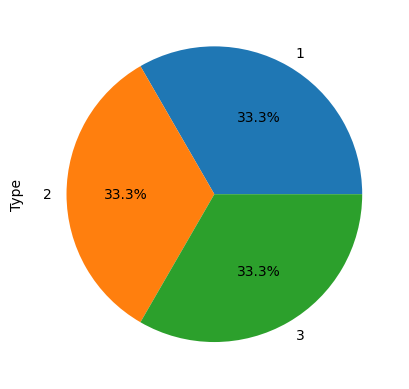

In [ ]:
from sklearn.utils import resample

# Downsampl = resize cái lớn (1,2) về bằng cái nhỏ (0) -> downsampling 1,2 = như 0
class2_df_downsample = resample(class2_df, replace=True,
                                n_samples=len(class1_df),
                                random_state=42)
class3_df_downsample = resample(class3_df, replace=True,
                                n_samples=len(class1_df),
                                random_state=42)
print(class2_df_downsample.shape,class3_df_downsample.shape)

## concat to get the downsampled data
data_downsampled = pd.concat([class2_df_downsample, class3_df_downsample, class1_df])
print(data_downsampled['specific.disorder'].value_counts())
data_downsampled.groupby('specific.disorder').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

## Upsampling

### By copying

In [ ]:
# train:test=8:2 -> test=411x0.2:3=27
class1_df_test = class1_df.iloc[:27,:]; class1_df_train = class1_df.iloc[27:,:] #95
class2_df_test = class2_df.iloc[:27,:]; class2_df_train = class2_df.iloc[27:,:] #117
class3_df_test = class3_df.iloc[:27,:]; class3_df_train = class3_df.iloc[27:,:] #199
print(class1_df_train.shape,class2_df_train.shape,class3_df_train.shape)

(68, 1148) (90, 1148) (172, 1148)


(68, 1148) (90, 1148) (172, 1148)
(172, 1148) (172, 1148)
0    172
1    172
2    172
Name: specific.disorder, dtype: int64


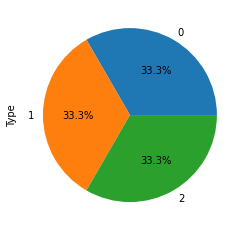

In [ ]:
#######         two techniques for upsampling          ######
#### 1. upsample a dataset by simply copying records from minority classes ####

# để tránh trong tập train có copy của tập test -> chia train trc khi copy
# train:test=8:2 -> test=411x0.2:3=27
class1_df_test = class1_df.iloc[:27,:]; class1_df_train = class1_df.iloc[27:,:] #95
class2_df_test = class2_df.iloc[:27,:]; class2_df_train = class2_df.iloc[27:,:] #117
class3_df_test = class3_df.iloc[:27,:]; class3_df_train = class3_df.iloc[27:,:] #199
print(class1_df_train.shape,class2_df_train.shape,class3_df_train.shape)
#->class2: nhiều nhất

from sklearn.utils import resample
class1_df_train_upsample = resample(class1_df_train,
             replace=True,
             n_samples=len(class2_df_train),
             random_state=42)
class2_df_train_upsample = resample(class2_df_train,
             replace=True,
             n_samples=len(class2_df_train),
             random_state=42)
print(class1_df_train_upsample.shape,class2_df_train_upsample.shape)

data_upsampled = pd.concat([class1_df_train_upsample, class2_df_train_upsample,class3_df_train])
print(data_upsampled['specific.disorder'].value_counts())

data_upsampled.groupby('specific.disorder').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [ ]:
#save the 1st upsampling data
test_data  = pd.concat([class1_df_test, class2_df_test,class3_df_test])
test_data.to_csv('UpsamplingByCopying_test.csv')

train_data = data_upsampled
train_data.to_csv('UpsamplingByCopying_train.csv')

###Upsampling with SMOTE

In [ ]:
X = SZ_BD_D_df.drop(['main.disorder','no.','sex','age','education','IQ','eeg.date','specific.disorder'],axis=1)
y = SZ_BD_D_df['specific.disorder']

print(X.shape,y.shape)

(383, 1140) (383,)


In [ ]:
##### Upsampling with SMOTE #########
#add instances to dataset which are not exactly the copy of existing instances
#but are very similar to the original instances.
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
X = SZ_BD_D_df.drop(['main.disorder','no.','sex','age','education','IQ','eeg.date','specific.disorder'],axis=1)
y = SZ_BD_D_df['specific.disorder']
print(SZ_BD_D_df['specific.disorder'].value_counts())

#Use SMOTE for upsampling
su = SMOTE(random_state=42)
X_smote, y_smote = su.fit_resample(X, y)

print("After Upsampling:")
print(y_smote.value_counts())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2    199
1    117
3     67
Name: specific.disorder, dtype: int64
After Upsampling:
2    199
1    199
3    199
Name: specific.disorder, dtype: int64


In [ ]:
print(type(X_smote),type(y_smote))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


# normal data

In [ ]:
# create feature matrix and target vector
X = SZ_BD_D_df.drop(['main.disorder','no.','sex','age','education','IQ','eeg.date','specific.disorder'], axis=1)
y = SZ_BD_D_df['specific.disorder']

from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(y) #convert target from nominal catogeriocal into one-hot-encoder
#from scipy import sparse
#y = sparse.csr_matrix(y)
print("shape of X:", X.shape)
print("shape of y:", y.shape)

# split into train & test set
print("-----------------------")
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1742, shuffle=True)
print("Shape of train and test sets:", X_train.shape, y_train.shape)

shape of X: (383, 1140)
shape of y: (383, 3)
-----------------------
Shape of train and test sets: (306, 1140) (306, 3)


# train with downsampling

In [ ]:
# create feature matrix and target vector
X_d = data_downsampled.drop(['main.disorder','no.','sex','age','education','IQ','eeg.date'],axis=1)

y_d = data_downsampled['specific.disorder']

#from sklearn.preprocessing import LabelBinarizer
#y = LabelBinarizer().fit_transform(y) #convert target from nominal catogeriocal into one-hot-encoder
print("shape of X",X_d.shape)
print("shape of y",y_d.shape)

# split into train & test set
print("-----------------------")
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split( X_d, y_d, test_size=0.2, random_state=1742, shuffle=False)
print("Shape of train and test sets:",X_train_d.shape,X_test_d.shape)
X_d

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, SelectPercentile
from sklearn.feature_selection import f_classif #ANOVA correlation coefficient (linear)
from sklearn.feature_selection import f_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

svc_clf= SVC(kernel='sigmoid',decision_function_shape='ovr')
std_slc = StandardScaler()
pca = PCA(n_components=100)

#### 1.1: PCA + SVC #####
pipe = Pipeline(steps=[
                       ('std_slc', std_slc),
                       ('pca', pca),
                       ('svm', svc_clf)])
pipe.fit(X_train_d, y_train_d)
y_pred= pipe.predict(X_test_d)
print("SVM:")
print(classification_report(y_test_d, y_pred))

### 1.2: VT + PCA + SVM #####
print("___________________________")
Annova_PCA_SVM = Pipeline(steps=[('VarianceThreshold',VarianceThreshold(threshold=0.3)),
                        ('std_slc', std_slc),
                        ('pca', pca),
                       ('svm', svc_clf)])
Annova_PCA_SVM.fit(X_train_d, y_train_d)
y_pred_VT_PCA_SVM= Annova_PCA_SVM.predict(X_test_d)
print("VT_PCA_SVM:")
print(classification_report(y_test_d, y_pred_VT_PCA_SVM))

### 1.3: SelectPercentile + PCA + SVM #####
print("___________________________")
SelectPercent_PCA_SVM = Pipeline(steps=[('SelectPercentile',SelectPercentile()),
                        ('std_slc', std_slc),
                        ('pca', pca),
                       ('svm', svc_clf)])
SelectPercent_PCA_SVM.fit(X_train_d, y_train_d)
y_pred_SelectPercent_PCA_SVM= SelectPercent_PCA_SVM.predict(X_test_d)
print("SelectPercent_PCA_SVM:")
print(classification_report(y_test_d, y_pred_SelectPercent_PCA_SVM))

### 2.1: LDA + SVM #####
print("___________________________")
LDA_SVM = Pipeline(steps=[('VarianceThreshold',VarianceThreshold(threshold=0.3)),
                        ('std_slc', std_slc),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('svm', svc_clf)])
LDA_SVM.fit(X_train_d, y_train_d)
y_pred_LDA_SVM= LDA_SVM.predict(X_test_d)
print(" LDA + SVM ")
print(classification_report(y_test_d, y_pred_LDA_SVM))

### 2.2: VT + LDA + SVM #####
print("___________________________")
Annova_LDA_SVM = Pipeline(steps=[('VarianceThreshold',VarianceThreshold(threshold=0.3)),
                        ('std_slc', std_slc),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('svm', svc_clf)])
Annova_LDA_SVM.fit(X_train_d, y_train_d)
y_pred_Annova_LDA_SVM= Annova_LDA_SVM.predict(X_test_d)
print(" VT + LDA + SVM")
print(classification_report(y_test_d, y_pred_Annova_LDA_SVM))

### 3: VT + SVM #####
print("___________________________")
Annova_SVM = Pipeline(steps=[('VarianceThreshold',VarianceThreshold(threshold=0.3)),
                        ('std_slc', std_slc),

                       ('svm', svc_clf)])
Annova_SVM.fit(X_train_d, y_train_d)
y_pred_Annova_SVM= Annova_SVM.predict(X_test_d)
print(" VT  + SVM")
print(classification_report(y_test_d, y_pred_Annova_SVM))

SVM:
              precision    recall  f1-score   support

           0       1.00      0.18      0.30        57
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.18        57
   macro avg       0.33      0.06      0.10        57
weighted avg       1.00      0.18      0.30        57

___________________________
VT_PCA_SVM:
              precision    recall  f1-score   support

           0       1.00      0.16      0.27        57
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.16        57
   macro avg       0.33      0.05      0.09        57
weighted avg       1.00      0.16      0.27        57

___________________________
SelectPercent_PCA_SVM:
              precision    recall  f1-score   support

           0       1.00      0.37      0.54        57
           1       0.00      0.00

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

 LDA + SVM 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

___________________________
 VT + LDA + SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

___________________________
 VT  + SVM
              precision    recall  f1-score   support

           0       1.00      0.18      0.30        57
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.18        57
   macro avg       0.33      0.06      0.10        57
weighted avg       1.00      0.18

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Train with Upsampling

In [ ]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split( X_smote, y_smote, test_size=0.2, random_state=1742, shuffle=True)

In [ ]:
print(type(y_test_smote))
y_test_smote_df = pd.Series.to_frame(y_test_smote)
print(y_test_smote_df.value_counts())

<class 'pandas.core.series.Series'>
specific.disorder
1                    46
2                    44
0                    30
dtype: int64


## plot cumulative explained variance

Text(0.5, 1.0, 'PCA')

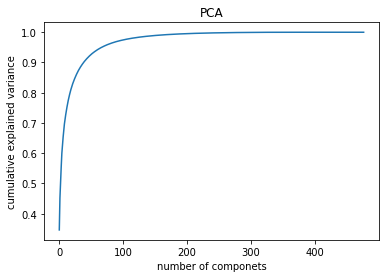

In [ ]:
pca = PCA().fit(X_train_smote,y_train_smote)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of componets")
plt.ylabel("cumulative explained variance")
plt.title("PCA")

Text(0.5, 1.0, 'LDA')

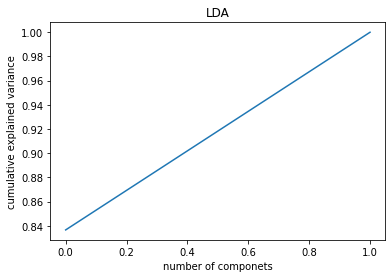

In [ ]:
lda = LinearDiscriminantAnalysis().fit(X_train_smote,y_train_smote)
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel("number of componets")
plt.ylabel("cumulative explained variance")
plt.title("LDA")

## SVM

In [ ]:
svc_clf= SVC(kernel='sigmoid',decision_function_shape='ovr')
std_slc = StandardScaler()
pca = PCA(n_components=100)

#### 1.1: PCA + SVC #####
pipe = Pipeline(steps=[
                       ('std_slc', std_slc),
                       ('pca', pca),
                       ('svm', svc_clf)])
pipe.fit(X_train_smote, y_train_smote)
y_pred= pipe.predict(X_test_smote)
print("SVM:")
print(classification_report(y_test_smote, y_pred))

### 1.2: VT + PCA + SVM #####
print("___________________________")
Annova_PCA_SVM = Pipeline(steps=[('VarianceThreshold',VarianceThreshold(threshold=0.3)),
                        ('std_slc', std_slc),
                        ('pca', pca),
                       ('svm', svc_clf)])
Annova_PCA_SVM.fit(X_train_smote, y_train_smote)
y_pred_VT_PCA_SVM= Annova_PCA_SVM.predict(X_test_smote)
print("VT_PCA_SVM:")
print(classification_report(y_test_smote, y_pred_VT_PCA_SVM))

### 1.3: SelectPercentile + PCA + SVM #####
print("___________________________")
SelectPercent_PCA_SVM = Pipeline(steps=[('SelectPercentile',SelectPercentile()),
                        ('std_slc', std_slc),
                        ('pca', pca),
                       ('svm', svc_clf)])
SelectPercent_PCA_SVM.fit(X_train_smote, y_train_smote)
y_pred_SelectPercent_PCA_SVM= SelectPercent_PCA_SVM.predict(X_test_smote)
print("SelectPercent_PCA_SVM:")
print(classification_report(y_test_smote, y_pred_SelectPercent_PCA_SVM))

### 2.1: LDA + SVM #####
print("___________________________")
LDA_SVM = Pipeline(steps=[('VarianceThreshold',VarianceThreshold(threshold=0.3)),
                        ('std_slc', std_slc),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('svm', svc_clf)])
LDA_SVM.fit(X_train_smote, y_train_smote)
y_pred_LDA_SVM= LDA_SVM.predict(X_test_smote)
print(" LDA + SVM ")
print(classification_report(y_test_smote, y_pred_LDA_SVM))

### 2.2: VT + LDA + SVM #####
print("___________________________")
Annova_LDA_SVM = Pipeline(steps=[('VarianceThreshold',VarianceThreshold(threshold=0.3)),
                        ('std_slc', std_slc),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('svm', svc_clf)])
Annova_LDA_SVM.fit(X_train_smote, y_train_smote)
y_pred_Annova_LDA_SVM= Annova_LDA_SVM.predict(X_test_smote)
print(" VT + LDA + SVM")
print(classification_report(y_test_smote, y_pred_Annova_LDA_SVM))

### 3: VT + SVM #####
print("___________________________")
Annova_SVM = Pipeline(steps=[('VarianceThreshold',VarianceThreshold(threshold=0.3)),
                        ('std_slc', std_slc),

                       ('svm', svc_clf)])
Annova_SVM.fit(X_train_smote, y_train_smote)
y_pred_Annova_SVM= Annova_SVM.predict(X_test_smote)
print(" VT  + SVM")
print(classification_report(y_test_smote, y_pred_Annova_SVM))

SVM:
              precision    recall  f1-score   support

           1       0.70      0.15      0.25        46
           2       0.34      0.64      0.45        33
           3       0.43      0.51      0.47        41

    accuracy                           0.41       120
   macro avg       0.49      0.43      0.39       120
weighted avg       0.51      0.41      0.38       120

___________________________
VT_PCA_SVM:
              precision    recall  f1-score   support

           1       0.64      0.15      0.25        46
           2       0.34      0.64      0.45        33
           3       0.42      0.49      0.45        41

    accuracy                           0.40       120
   macro avg       0.47      0.43      0.38       120
weighted avg       0.48      0.40      0.37       120

___________________________
SelectPercent_PCA_SVM:
              precision    recall  f1-score   support

           1       0.51      0.54      0.53        46
           2       0.37      0.67

In [ ]:
#Feature Extraction
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding

# Feature SElection:
from sklearn.feature_selection import VarianceThreshold, SelectPercentile,f_classif

# 1: VT + others. 2: SP + others. 3:F + others

# 0. DecisionTreeClassifier
SVM = Pipeline(steps=[
                       ('std_slc', StandardScaler()),
                       ('SVM',SVC(kernel='sigmoid',decision_function_shape='ovr'))])
SVM.fit(X_train_smote, y_train_smote)
print("SVM")
print(classification_report(y_test_smote, SVM.predict(X_test_smote)))

## 1. VT
# 1.1 VT_PCA_LR
VT_PCA_SVM =  Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('std_slc', StandardScaler()),
                       ('PCA', PCA()),
                       ('SVM',SVC(kernel='sigmoid',decision_function_shape='ovr'))])
VT_PCA_SVM.fit(X_train_smote, y_train_smote)
print("1.1 VT_PCA_SVM")
print(classification_report(y_test_smote, VT_PCA_SVM.predict(X_test_smote)))

# 1.2 VT_LDA_LR
VT_LDA_SVM = Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('std_slc', StandardScaler()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('SVM',SVC(kernel='sigmoid',decision_function_shape='ovr'))])
VT_LDA_SVM.fit(X_train_smote, y_train_smote)
print("1.2 VT_LDA_SVM")
print(classification_report(y_test_smote, VT_LDA_SVM.predict(X_test_smote)))

# 1.2 VT_ICA_LR
VT_ICA_SVM =Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('std_slc', StandardScaler()),
                       ('ICA', FastICA()),
                       ('SVM',SVC(kernel='sigmoid',decision_function_shape='ovr'))])
VT_ICA_SVM.fit(X_train_smote, y_train_smote)
print("1.3 VT_ICA_SVM")
print(classification_report(y_test_smote, VT_ICA_SVM.predict(X_test_smote)))

# 1.4 VT_LLE_LR
VT_LLE_SVM =  Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('std_slc', StandardScaler()),
                       ('LLE', LocallyLinearEmbedding()),
                       ('SVM',SVC(kernel='sigmoid',decision_function_shape='ovr'))])
VT_LLE_SVM.fit(X_train_smote, y_train_smote)
print("1.4 VT_LLE_SVM")
print(classification_report(y_test_smote, VT_LLE_SVM.predict(X_test_smote)))

## 2. SP
# 2.1 SP_PCA_LR
SP_PCA_SVM =  Pipeline(steps=[
                       ('std_slc', StandardScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('PCA', PCA()),
                       ('SVM',SVC(kernel='sigmoid',decision_function_shape='ovr'))])
SP_PCA_SVM.fit(X_train_smote, y_train_smote)
print("1.1 SP_PCA_SVM")
print(classification_report(y_test_smote, SP_PCA_SVM.predict(X_test_smote)))

# 1.2 VT_LDA_LR
SP_LDA_SVM  = Pipeline(steps=[
                       ('std_slc', StandardScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('SVM',SVC(kernel='sigmoid',decision_function_shape='ovr'))])
SP_LDA_SVM.fit(X_train_smote, y_train_smote)
print("1.2 SP_LDA_SVM")
print(classification_report(y_test_smote, SP_LDA_SVM.predict(X_test_smote)))

# 1.2 VT_ICA_LR
SP_ICA_SVM  = Pipeline(steps=[
                       ('std_slc', StandardScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('ICA', FastICA()),
                       ('SVM',SVC(kernel='sigmoid',decision_function_shape='ovr'))])
SP_ICA_SVM.fit(X_train_smote, y_train_smote)
print("1.3 SP_ICA_SVM")
print(classification_report(y_test_smote, SP_ICA_SVM.predict(X_test_smote)))

# 1.4 SP_LLE_LR
SP_LLE_SVM  = Pipeline(steps=[
                       ('std_slc', StandardScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('LLE', LocallyLinearEmbedding()),
                       ('SVM',SVC(kernel='sigmoid',decision_function_shape='ovr'))])
SP_LLE_SVM.fit(X_train_smote, y_train_smote)
print("1.4 SP_LLE_SVM")
print(classification_report(y_test_smote, SP_LLE_SVM.predict(X_test_smote)))

SVM
              precision    recall  f1-score   support

           1       0.75      0.13      0.22        46
           2       0.37      0.67      0.47        33
           3       0.44      0.56      0.49        41

    accuracy                           0.42       120
   macro avg       0.52      0.45      0.40       120
weighted avg       0.54      0.42      0.38       120

1.1 VT_PCA_SVM
              precision    recall  f1-score   support

           1       0.75      0.13      0.22        46
           2       0.37      0.67      0.47        33
           3       0.44      0.56      0.49        41

    accuracy                           0.42       120
   macro avg       0.52      0.45      0.40       120
weighted avg       0.54      0.42      0.38       120

1.2 VT_LDA_SVM
              precision    recall  f1-score   support

           1       0.67      0.65      0.66        46
           2       0.55      0.48      0.52        33
           3       0.85      0.95      0.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


1.3 VT_ICA_SVM
              precision    recall  f1-score   support

           1       0.77      0.59      0.67        46
           2       0.52      0.36      0.43        33
           3       0.66      1.00      0.80        41

    accuracy                           0.67       120
   macro avg       0.65      0.65      0.63       120
weighted avg       0.67      0.67      0.65       120

1.4 VT_LLE_SVM
              precision    recall  f1-score   support

           1       0.40      0.50      0.45        46
           2       0.33      0.45      0.38        33
           3       0.44      0.20      0.27        41

    accuracy                           0.38       120
   macro avg       0.39      0.38      0.37       120
weighted avg       0.40      0.38      0.37       120

1.1 SP_PCA_SVM
              precision    recall  f1-score   support

           1       0.51      0.54      0.53        46
           2       0.37      0.67      0.48        33
           3       0.58      0

### SelectPercentile-PCA-SVM

In [ ]:
preprocessor = FeatureUnion([('std_slc', std_slc),('SelectPercentile',SelectPercentile()),('pca',PCA())])
pipe = Pipeline([("preprocess",preprocessor),("classifier",SVC())])

search_space = [{"preprocess__SelectPercentile__percentile":np.arange(1,100,10),

                 "preprocess__pca__n_components":np.arange(1,169,1),
                 "preprocess__pca__svd_solver":['auto', 'full', 'arpack', 'randomized'],
                 "classifier__kernel":['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                 "classifier__degree":np.arange(1,10,1),
                 'classifier__gamma':['scale', 'auto'],
                 'classifier__decision_function_shape':['ovo', 'ovr']
                 }]
#"preprocess__SelectPercentile__score_func":['f_classif','mutual_info_classif', 'chi2', 'SelectKBest', 'SelectFpr', 'SelectFdr', 'SelectFwe', 'GenericUnivariateSelect'],
clf = RandomizedSearchCV(pipe, search_space, scoring='accuracy', cv=5 ,n_jobs=-1)

best_model = clf.fit(X_train_smote,y_train_smote)

y_pred = best_model.predict(X_test_smote)
print(classification_report(y_test_smote,y_pred))

print(best_model.best_estimator_)
print(best_model.best_estimator_.get_params())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 217, in fit
    " Input is a {}x{} matrix.".format(X.shape[0], X.shape[1])
ValueError: Precompute

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        30
           1       0.68      0.74      0.71        46
           2       0.60      0.48      0.53        44

    accuracy                           0.66       120
   macro avg       0.66      0.67      0.66       120
weighted avg       0.65      0.66      0.65       120

Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('std_slc', StandardScaler()),
                                                ('SelectPercentile',
                                                 SelectPercentile(percentile=51)),
                                                ('pca',
                                                 PCA(n_components=10,
                                                     svd_solver='full'))])),
                ('classifier', SVC(gamma='auto', kernel='linear'))])
{'memory': None, 'steps': [('preprocess', FeatureUnion(transformer_list=[('std_slc', 

In [ ]:
SelectPercent_PCA_SVM.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'SelectPercentile', 'std_slc', 'pca', 'svm', 'SelectPercentile__percentile', 'SelectPercentile__score_func', 'std_slc__copy', 'std_slc__with_mean', 'std_slc__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'svm__C', 'svm__break_ties', 'svm__cache_size', 'svm__class_weight', 'svm__coef0', 'svm__decision_function_shape', 'svm__degree', 'svm__gamma', 'svm__kernel', 'svm__max_iter', 'svm__probability', 'svm__random_state', 'svm__shrinking', 'svm__tol', 'svm__verbose'])

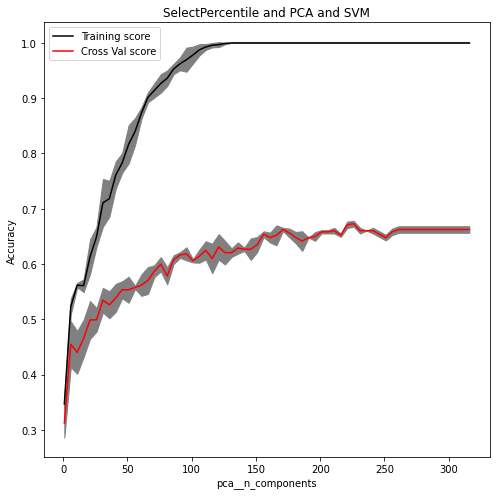

In [ ]:
###### SEARCH FOR n_components of SelectPercent_PCA_SVM  ##########
SelectPercent_PCA_SVM = Pipeline(steps=[
    ('std_slc', StandardScaler()),('SelectPercentile',SelectPercentile(percentile=81)),
    ('pca',PCA(svd_solver='full')),('classifier', SVC(degree=4, kernel='linear'))])

param_range = np.arange(1,X_smote.shape[1],5)
train_scores,test_scores = validation_curve(
    #clf
    SelectPercent_PCA_SVM,
    # feature matric & target vector
    X_train_smote,y_train_smote,
    #Hyper
    param_name="pca__n_components", param_range=param_range,
    #fold, sorce, use all cores
    cv=3,scoring="accuracy",n_jobs=-1
)

#cal Mean & Std for Train & Test Score
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.rcParams['figure.figsize'] = [7,7]
#plot the Mean Acc
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross Val score", color="red")

#plot acc bands
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gray")

#create plot
plt.title("SelectPercentile and PCA and SVM")
plt.xlabel("pca__n_components")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
SelectPercent_PCA_SVM = Pipeline(steps=[
    ('std_slc', StandardScaler()),('SelectPercentile',SelectPercentile(percentile=81)),
    ('pca',PCA(n_components=200,svd_solver='full')),('classifier', SVC(degree=4, kernel='linear'))])
SelectPercent_PCA_SVM.fit(X_train_smote,y_train_smote)
print(classification_report(SelectPercent_PCA_SVM.predict(X_test_smote),y_test_smote))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        45
           1       0.62      0.60      0.61        42
           2       0.45      0.61      0.52        33

    accuracy                           0.65       120
   macro avg       0.67      0.64      0.65       120
weighted avg       0.69      0.65      0.66       120



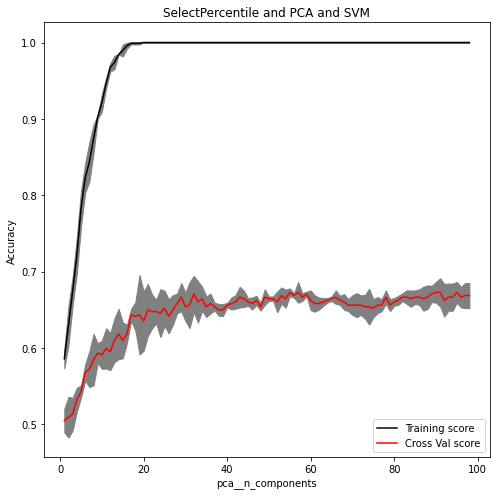

In [ ]:
###### SEARCH FOR Percentile of SelectPercent_PCA_SVM  ##########
SelectPercent_PCA_SVM = Pipeline(steps=[
    ('std_slc', StandardScaler()),('SelectPercentile',SelectPercentile()),
    ('pca',PCA(svd_solver='full')),('classifier', SVC(degree=4, kernel='linear'))])

param_range = np.arange(1,99,1)
train_scores,test_scores = validation_curve(
    #clf
    SelectPercent_PCA_SVM,
    # feature matric & target vector
    X_train_smote,y_train_smote,
    #Hyper
    param_name="SelectPercentile__percentile", param_range=param_range,
    #fold, sorce, use all cores
    cv=3,scoring="accuracy",n_jobs=-1
)

#cal Mean & Std for Train & Test Score
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.rcParams['figure.figsize'] = [7,7]
#plot the Mean Acc
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross Val score", color="red")

#plot acc bands
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gray")

#create plot
plt.title("SelectPercentile and PCA and SVM")
plt.xlabel("pca__n_components")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# chọn theo cao nhất của 2 graph learning curve
SelectPercent20_PCA200_SVM = Pipeline(steps=[
    ('std_slc', StandardScaler()),('SelectPercentile',SelectPercentile(percentile=20)),
    ('pca',PCA(n_components=200,svd_solver='full')),('classifier', SVC(degree=4, kernel='linear'))])
SelectPercent20_PCA200_SVM.fit(X_train_smote,y_train_smote)
print(classification_report(SelectPercent20_PCA200_SVM.predict(X_test_smote),y_test_smote))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76        53
           1       0.62      0.60      0.61        42
           2       0.30      0.52      0.38        25

    accuracy                           0.60       120
   macro avg       0.62      0.59      0.58       120
weighted avg       0.70      0.60      0.63       120



### VT_LDA_SVM

In [ ]:
print(np.arange(0.1,0.99,0.05))
n_classes=3;  n_features = 1140
print(min(n_features, n_classes - 1)) #n_components cannot be larger than min(n_features, n_classes - 1)\
VT_LDA_SVM.get_params().keys()

[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.85 0.9  0.95]
2


dict_keys(['memory', 'steps', 'verbose', 'VarianceThreshold', 'std_slc', 'LDA', 'SVM', 'VarianceThreshold__threshold', 'std_slc__copy', 'std_slc__with_mean', 'std_slc__with_std', 'LDA__covariance_estimator', 'LDA__n_components', 'LDA__priors', 'LDA__shrinkage', 'LDA__solver', 'LDA__store_covariance', 'LDA__tol', 'SVM__C', 'SVM__break_ties', 'SVM__cache_size', 'SVM__class_weight', 'SVM__coef0', 'SVM__decision_function_shape', 'SVM__degree', 'SVM__gamma', 'SVM__kernel', 'SVM__max_iter', 'SVM__probability', 'SVM__random_state', 'SVM__shrinking', 'SVM__tol', 'SVM__verbose'])

In [ ]:
VT_LDA_SVM = Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('std_slc', StandardScaler()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('SVM',SVC())])

search_space = [{"VarianceThreshold__threshold":np.arange(0.1,0.99,0.05),

                 "LDA__solver":['svd', 'lsqr', 'eigen'],
                 "LDA__shrinkage":['auto',' float','None'],
                 'SVM__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                 "SVM__degree":np.arange(1,100,2),
                 'SVM__gamma':['scale', 'auto'],
                 'SVM__decision_function_shape':['ovo', 'ovr']
                 }]
#"preprocess__SelectPercentile__score_func":['f_classif','mutual_info_classif', 'chi2', 'SelectKBest', 'SelectFpr', 'SelectFdr', 'SelectFwe', 'GenericUnivariateSelect'],
clf = RandomizedSearchCV(VT_LDA_SVM, search_space, scoring='accuracy', cv=5 ,n_jobs=-1)

best_model = clf.fit(X_train_smote,y_train_smote)

y_pred = best_model.predict(X_test_smote)
print(classification_report(y_test_smote,y_pred))

print(best_model.best_estimator_)
print(best_model.best_estimator_.get_params())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

ValueError: ignored

In [ ]:
VT_LDA_SVM = Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('std_slc', StandardScaler()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('SVM',SVC())])
#"LDA__n_components":np.arange(2,169,2),
search_space = [{"VarianceThreshold__threshold":np.arange(0.1,0.99,0.05),
                 "LDA__n_components":np.arange(0,2,0.01),
                 "LDA__solver":['svd', 'lsqr', 'eigen'],
                 #"LDA__shrinkage":['auto',' float','None'],
                 'SVM__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                 "SVM__degree":np.arange(1,100,2),
                 'SVM__gamma':['scale', 'auto'],
                 'SVM__decision_function_shape':['ovo', 'ovr']
                 }]
#"preprocess__SelectPercentile__score_func":['f_classif','mutual_info_classif', 'chi2', 'SelectKBest', 'SelectFpr', 'SelectFdr', 'SelectFwe', 'GenericUnivariateSelect'],
clf = RandomizedSearchCV(VT_LDA_SVM, search_space, scoring='accuracy', cv=5 ,n_jobs=-1)

best_model = clf.fit(X_train_smote,y_train_smote)

y_pred = best_model.predict(X_test_smote)
print(classification_report(y_test_smote,y_pred))

print(best_model.best_estimator_)
print(best_model.best_estimator_.get_params())

### theo cumalative curve

In [ ]:
VT_PCA_SVM = Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('std_slc', StandardScaler()),
                       ('PCA', PCA(n_components = 75)),
                       ('SVM',SVC())])
VT_PCA_SVM.fit(X_train_smote,y_train_smote)
print(classification_report(y_test_smote,VT_PCA_SVM.predict(X_test_smote)))

VT_LDA_SVM = Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('std_slc', StandardScaler()),
                       ('LDA', LinearDiscriminantAnalysis(n_components = 0.70)),
                       ('SVM',SVC())])
VT_LDA_SVM.fit(X_train_smote,y_train_smote)
print(classification_report(y_test_smote,VT_LDA_SVM.predict(X_test_smote)))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        36
           1       0.57      0.60      0.59        40
           2       0.56      0.45      0.50        44

    accuracy                           0.64       120
   macro avg       0.64      0.66      0.64       120
weighted avg       0.63      0.64      0.63       120



TypeError: ignored

## Logistic Regression

In [ ]:
#Feature Extraction
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding

# Feature SElection:
from sklearn.feature_selection import VarianceThreshold, SelectPercentile,f_classif

# 1: VT + others. 2: SP + others. 3:F + others

# 0. LR
LR = Pipeline(steps=[
                       ('std_slc', StandardScaler()),
                       ('LR',LogisticRegression())])
LR.fit(X_train_smote, y_train_smote)
print("LR")
print(classification_report(y_test_smote, LR.predict(X_test_smote)))

## 1. VT
# 1.1 VT_PCA_LR
VT_PCA_LR =  Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('std_slc', StandardScaler()),
                       ('PCA', PCA()),
                       ('LR',LogisticRegression())])
VT_PCA_LR.fit(X_train_smote, y_train_smote)
print("1.1 VT_PCA_LR")
print(classification_report(y_test_smote, VT_PCA_LR.predict(X_test_smote)))

# 1.2 VT_LDA_LR
VT_LDA_LR = Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('std_slc', StandardScaler()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('LR',LogisticRegression())])
VT_LDA_LR.fit(X_train_smote, y_train_smote)
print("1.2 VT_LDA_LR")
print(classification_report(y_test_smote, VT_LDA_LR.predict(X_test_smote)))

# 1.2 VT_ICA_LR
VT_ICA_LR =Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('std_slc', StandardScaler()),
                       ('ICA', FastICA()),
                       ('LR',LogisticRegression())])
VT_ICA_LR.fit(X_train_smote, y_train_smote)
print("1.3 VT_ICA_LR")
print(classification_report(y_test_smote, VT_ICA_LR.predict(X_test_smote)))

# 1.4 VT_LLE_LR
VT_LLE_LR =  Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('std_slc', StandardScaler()),
                       ('LLE', LocallyLinearEmbedding()),
                       ('LR',LogisticRegression())])
VT_LLE_LR.fit(X_train_smote, y_train_smote)
print("1.4 VT_LLE_LR")
print(classification_report(y_test_smote, VT_LLE_LR.predict(X_test_smote)))

## 2. SP
# 2.1 SP_PCA_LR
SP_PCA_LR =  Pipeline(steps=[
                       ('std_slc', StandardScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('PCA', PCA()),
                       ('LR',LogisticRegression())])
SP_PCA_LR.fit(X_train_smote, y_train_smote)
print("1.1 SP_PCA_LR")
print(classification_report(y_test_smote, SP_PCA_LR.predict(X_test_smote)))

# 1.2 VT_LDA_LR
SP_LDA_LR  = Pipeline(steps=[
                       ('std_slc', StandardScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('LR',LogisticRegression())])
SP_LDA_LR.fit(X_train_smote, y_train_smote)
print("1.2 SP_LDA_LR")
print(classification_report(y_test_smote, SP_LDA_LR.predict(X_test_smote)))

# 1.2 VT_ICA_LR
SP_ICA_LR  = Pipeline(steps=[
                       ('std_slc', StandardScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('ICA', FastICA()),
                       ('LR',LogisticRegression())])
SP_ICA_LR.fit(X_train_smote, y_train_smote)
print("1.3 SP_ICA_LR")
print(classification_report(y_test_smote, SP_ICA_LR.predict(X_test_smote)))

# 1.4 SP_LLE_LR
SP_LLE_LR  = Pipeline(steps=[
                       ('std_slc', StandardScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('LLE', LocallyLinearEmbedding()),
                       ('LR',LogisticRegression())])
SP_LLE_LR.fit(X_train_smote, y_train_smote)
print("1.4 SP_LLE_LR")
print(classification_report(y_test_smote, SP_LLE_LR.predict(X_test_smote)))

## 3. f_classif
# 2.1 fclassif_PCA_LR
F_PCA_LR = Pipeline(steps=[
                       ('std_slc', StandardScaler()),
                       ('f_classif', f_classif()),
                       ('PCA', PCA()),
                       ('LR',LogisticRegression())])
F_PCA_LR.fit(X_train_smote, y_train_smote)
print("1.1 F_PCA_LR")
print(classification_report(y_test_smote, F_PCA_LR.predict(X_test_smote)))

# 1.2 VT_LDA_LR
F_LDA_LR  = Pipeline(steps=[
                       ('std_slc', StandardScaler()),
                       ('f_classif', f_classif()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('LR',LogisticRegression())])
F_LDA_LR.fit(X_train_smote, y_train_smote)
print("1.2 F_LDA_LR")
print(classification_report(y_test_smote, F_LDA_LR.predict(X_test_smote)))

# 1.2 F_ICA_LR
F_ICA_LR  = Pipeline(steps=[
                       ('std_slc', StandardScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('ICA', FastICA()),
                       ('LR',LogisticRegression())])
F_ICA_LR.fit(X_train_smote, y_train_smote)
print("1.3 F_ICA_LR")
print(classification_report(y_test_smote, F_ICA_LR.predict(X_test_smote)))

# 1.4 SP_LLE_LR
F_LLE_LR  = Pipeline(steps=[
                       ('std_slc', StandardScaler()),
                       ('f_classif', f_classif()),
                       ('LLE', LocallyLinearEmbedding()),
                       ('LR',LogisticRegression())])
F_LLE_LR.fit(X_train_smote, y_train_smote)
print("1.4 F_LLE_LR")
print(classification_report(y_test_smote, F_LLE_LR.predict(X_test_smote)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LR
              precision    recall  f1-score   support

           1       0.75      0.59      0.66        46
           2       0.66      0.58      0.61        33
           3       0.67      0.90      0.77        41

    accuracy                           0.69       120
   macro avg       0.69      0.69      0.68       120
weighted avg       0.70      0.69      0.68       120



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


1.1 VT_PCA_LR
              precision    recall  f1-score   support

           1       0.75      0.59      0.66        46
           2       0.66      0.58      0.61        33
           3       0.67      0.90      0.77        41

    accuracy                           0.69       120
   macro avg       0.69      0.69      0.68       120
weighted avg       0.70      0.69      0.68       120

1.2 VT_LDA_LR
              precision    recall  f1-score   support

           1       0.67      0.72      0.69        46
           2       0.67      0.30      0.42        33
           3       0.70      0.95      0.80        41

    accuracy                           0.68       120
   macro avg       0.68      0.66      0.64       120
weighted avg       0.68      0.68      0.66       120



/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


1.3 VT_ICA_LR
              precision    recall  f1-score   support

           1       0.73      0.80      0.76        46
           2       0.45      0.27      0.34        33
           3       0.80      0.95      0.87        41

    accuracy                           0.71       120
   macro avg       0.66      0.68      0.66       120
weighted avg       0.67      0.71      0.68       120

1.4 VT_LLE_LR


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        46
           2       0.29      1.00      0.45        33
           3       1.00      0.17      0.29        41

    accuracy                           0.33       120
   macro avg       0.43      0.39      0.25       120
weighted avg       0.42      0.33      0.22       120

1.1 SP_PCA_LR
              precision    recall  f1-score   support

           1       0.66      0.41      0.51        46
           2       0.41      0.45      0.43        33
           3       0.56      0.73      0.63        41

    accuracy                           0.53       120
   macro avg       0.54      0.53      0.52       120
weighted avg       0.55      0.53      0.53       120

1.2 SP_LDA_LR
              precision    recall  f1-score   support

           1       0.68      0.50      0.58        46
           2       0.43      0.45      0.44        33
           3       0.67      0.83      0.74    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TypeError: ignored

#### VT_LDA_LR

In [ ]:
VT_LDA_LR.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'VarianceThreshold', 'std_slc', 'LDA', 'LR', 'VarianceThreshold__threshold', 'std_slc__copy', 'std_slc__with_mean', 'std_slc__with_std', 'LDA__covariance_estimator', 'LDA__n_components', 'LDA__priors', 'LDA__shrinkage', 'LDA__solver', 'LDA__store_covariance', 'LDA__tol', 'LR__C', 'LR__class_weight', 'LR__dual', 'LR__fit_intercept', 'LR__intercept_scaling', 'LR__l1_ratio', 'LR__max_iter', 'LR__multi_class', 'LR__n_jobs', 'LR__penalty', 'LR__random_state', 'LR__solver', 'LR__tol', 'LR__verbose', 'LR__warm_start'])

In [ ]:
VT_LDA_LR = Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('std_slc', StandardScaler()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('LR',LogisticRegression())])

search_space = [{"VarianceThreshold__threshold":np.arange(0.1,0.99,0.05),

                 "LDA__solver":['svd', 'lsqr', 'eigen'],
                 "LDA__shrinkage":['auto',' float','None'],
                 'SVM__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                 "SVM__degree":np.arange(1,100,2),
                 'SVM__gamma':['scale', 'auto'],
                 'SVM__decision_function_shape':['ovo', 'ovr']
                 }]
#"preprocess__SelectPercentile__score_func":['f_classif','mutual_info_classif', 'chi2', 'SelectKBest', 'SelectFpr', 'SelectFdr', 'SelectFwe', 'GenericUnivariateSelect'],
clf = RandomizedSearchCV(VT_LDA_SVM, search_space, scoring='accuracy', cv=5 ,n_jobs=-1)

best_model = clf.fit(X_train_smote,y_train_smote)

y_pred = best_model.predict(X_test_smote)
print(classification_report(y_test_smote,y_pred))

print(best_model.best_estimator_)
print(best_model.best_estimator_.get_params())

## DT

In [ ]:
#Feature Extraction
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding

# Feature SElection:
from sklearn.feature_selection import VarianceThreshold, SelectPercentile,f_classif

# 1: VT + others. 2: SP + others. 3:F + others

# 0. DecisionTreeClassifier
DT = Pipeline(steps=[
                       ('Robust', RobustScaler()),
                       ('DT',DecisionTreeClassifier())])
DT.fit(X_train_smote, y_train_smote)
print("DT")
print(classification_report(y_test_smote, DT.predict(X_test_smote)))

## 1. VT
# 1.1 VT_PCA_LR
VT_PCA_DT =  Pipeline(steps=[
                       ('Robust', RobustScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('PCA', PCA()),
                       ('DT',DecisionTreeClassifier())])
VT_PCA_DT.fit(X_train_smote, y_train_smote)
print("1.1 VT_PCA_DT")
print(classification_report(y_test_smote, VT_PCA_DT.predict(X_test_smote)))

# 1.2 VT_LDA_LR
VT_LDA_DT = Pipeline(steps=[
                       ('Robust', RobustScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('DT',DecisionTreeClassifier())])
VT_LDA_DT.fit(X_train_smote, y_train_smote)
print("1.2 VT_LDA_DT")
print(classification_report(y_test_smote, VT_LDA_DT.predict(X_test_smote)))

# 1.2 VT_ICA_LR
VT_ICA_DT =Pipeline(steps=[
                       ('Robust', RobustScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('ICA', FastICA()),
                       ('DT',DecisionTreeClassifier())])
VT_ICA_DT.fit(X_train_smote, y_train_smote)
print("1.3 VT_ICA_DT")
print(classification_report(y_test_smote, VT_ICA_DT.predict(X_test_smote)))

# 1.4 VT_LLE_LR
VT_LLE_DT =  Pipeline(steps=[
                       ('Robust', RobustScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('LLE', LocallyLinearEmbedding()),
                       ('DT',DecisionTreeClassifier())])
VT_LLE_DT.fit(X_train_smote, y_train_smote)
print("1.4 VT_LLE_DT")
print(classification_report(y_test_smote, VT_LLE_DT.predict(X_test_smote)))

## 2. SP
# 2.1 SP_PCA_LR
SP_PCA_DT =  Pipeline(steps=[
                       ('Robust', RobustScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('PCA', PCA()),
                       ('DT',DecisionTreeClassifier())])
SP_PCA_DT.fit(X_train_smote, y_train_smote)
print("1.1 SP_PCA_DT")
print(classification_report(y_test_smote, SP_PCA_DT.predict(X_test_smote)))

# 1.2 VT_LDA_LR
SP_LDA_DT  = Pipeline(steps=[
                      ('Robust', RobustScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('DT',DecisionTreeClassifier())])
SP_LDA_DT.fit(X_train_smote, y_train_smote)
print("1.2 SP_LDA_DT")
print(classification_report(y_test_smote, SP_LDA_DT.predict(X_test_smote)))

# 1.2 VT_ICA_LR
SP_ICA_DT  = Pipeline(steps=[
                       ('Robust', RobustScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('ICA', FastICA()),
                       ('DT',DecisionTreeClassifier())])
SP_ICA_DT.fit(X_train_smote, y_train_smote)
print("1.3 SP_ICA_DT")
print(classification_report(y_test_smote, SP_ICA_DT.predict(X_test_smote)))

# 1.4 SP_LLE_LR
SP_LLE_DT  = Pipeline(steps=[
                       ('Robust', RobustScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('LLE', LocallyLinearEmbedding()),
                       ('DT',DecisionTreeClassifier())])
SP_LLE_DT.fit(X_train_smote, y_train_smote)
print("1.4 SP_LLE_DT")
print(classification_report(y_test_smote, SP_LLE_DT.predict(X_test_smote)))

DT
              precision    recall  f1-score   support

           1       0.69      0.59      0.64        46
           2       0.45      0.45      0.45        33
           3       0.69      0.80      0.74        41

    accuracy                           0.62       120
   macro avg       0.61      0.62      0.61       120
weighted avg       0.63      0.62      0.62       120

1.1 VT_PCA_DT
              precision    recall  f1-score   support

           1       0.63      0.52      0.57        46
           2       0.50      0.67      0.57        33
           3       0.82      0.76      0.78        41

    accuracy                           0.64       120
   macro avg       0.65      0.65      0.64       120
weighted avg       0.66      0.64      0.64       120

1.2 VT_LDA_DT
              precision    recall  f1-score   support

           1       0.64      0.76      0.69        46
           2       1.00      0.06      0.11        33
           3       0.60      0.93      0.73 

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


1.3 VT_ICA_DT
              precision    recall  f1-score   support

           1       0.59      0.63      0.61        46
           2       0.40      0.42      0.41        33
           3       0.56      0.49      0.52        41

    accuracy                           0.53       120
   macro avg       0.52      0.51      0.51       120
weighted avg       0.53      0.53      0.52       120

1.4 VT_LLE_DT
              precision    recall  f1-score   support

           1       0.40      0.30      0.35        46
           2       0.38      0.48      0.43        33
           3       0.44      0.46      0.45        41

    accuracy                           0.41       120
   macro avg       0.41      0.42      0.41       120
weighted avg       0.41      0.41      0.40       120

1.1 SP_PCA_DT
              precision    recall  f1-score   support

           1       0.59      0.59      0.59        46
           2       0.50      0.42      0.46        33
           3       0.63      0.71

## RF

In [ ]:
# 1: VT + others. 2: SP + others. 3:F + others

# 0. DecisionTreeClassifier
RF = Pipeline(steps=[
                       ('Robust', RobustScaler()),
                       ('RF',RandomForestClassifier())])
RF.fit(X_train_smote, y_train_smote)
print("RF")
print(classification_report(y_test_smote, RF.predict(X_test_smote)))

## 1. VT
# 1.1 VT_PCA_LR
VT_PCA_RF =  Pipeline(steps=[
                       ('Robust', RobustScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('PCA', PCA()),
                       ('RF',RandomForestClassifier())])
VT_PCA_RF.fit(X_train_smote, y_train_smote)
print("1.1 VT_PCA_RF")
print(classification_report(y_test_smote, VT_PCA_RF.predict(X_test_smote)))

# 1.2 VT_LDA_LR
VT_LDA_RF = Pipeline(steps=[
                       ('Robust', RobustScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('RF',RandomForestClassifier())])
VT_LDA_RF.fit(X_train_smote, y_train_smote)
print("1.2 VT_LDA_RF")
print(classification_report(y_test_smote, VT_LDA_RF.predict(X_test_smote)))

# 1.2 VT_ICA_LR
VT_ICA_RF =Pipeline(steps=[
                       ('Robust', RobustScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('ICA', FastICA()),
                       ('RF',RandomForestClassifier())])
VT_ICA_RF.fit(X_train_smote, y_train_smote)
print("1.3 VT_ICA_RF")
print(classification_report(y_test_smote, VT_ICA_RF.predict(X_test_smote)))

# 1.4 VT_LLE_LR
VT_LLE_RF =  Pipeline(steps=[
                       ('Robust', RobustScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('LLE', LocallyLinearEmbedding()),
                       ('RF',RandomForestClassifier())])
VT_LLE_RF.fit(X_train_smote, y_train_smote)
print("1.4 VT_LLE_RF")
print(classification_report(y_test_smote, VT_LLE_RF.predict(X_test_smote)))

## 2. SP
# 2.1 SP_PCA_LR
SP_PCA_RF =  Pipeline(steps=[
                       ('Robust', RobustScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('PCA', PCA()),
                       ('RF',RandomForestClassifier())])
SP_PCA_RF.fit(X_train_smote, y_train_smote)
print("1.1 SP_PCA_RF")
print(classification_report(y_test_smote, SP_PCA_RF.predict(X_test_smote)))

# 1.2 VT_LDA_LR
SP_LDA_RF  = Pipeline(steps=[
                      ('Robust', RobustScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('RF',RandomForestClassifier())])
SP_LDA_RF.fit(X_train_smote, y_train_smote)
print("1.2 SP_LDA_RF")
print(classification_report(y_test_smote, SP_LDA_RF.predict(X_test_smote)))

# 1.2 VT_ICA_LR
SP_ICA_RF  = Pipeline(steps=[
                       ('Robust', RobustScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('ICA', FastICA()),
                       ('RF',RandomForestClassifier())])
SP_ICA_RF.fit(X_train_smote, y_train_smote)
print("1.3 SP_ICA_RF")
print(classification_report(y_test_smote, SP_ICA_RF.predict(X_test_smote)))

# 1.4 SP_LLE_LR
SP_LLE_RF  = Pipeline(steps=[
                       ('Robust', RobustScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('LLE', LocallyLinearEmbedding()),
                       ('RF',RandomForestClassifier())])
SP_LLE_RF.fit(X_train_smote, y_train_smote)
print("1.4 SP_LLE_RF")
print(classification_report(y_test_smote, SP_LLE_RF.predict(X_test_smote)))

RF
              precision    recall  f1-score   support

           1       0.81      0.54      0.65        46
           2       0.51      0.70      0.59        33
           3       0.82      0.88      0.85        41

    accuracy                           0.70       120
   macro avg       0.71      0.71      0.70       120
weighted avg       0.73      0.70      0.70       120

1.1 VT_PCA_RF
              precision    recall  f1-score   support

           1       0.96      0.50      0.66        46
           2       0.51      1.00      0.67        33
           3       1.00      0.76      0.86        41

    accuracy                           0.73       120
   macro avg       0.82      0.75      0.73       120
weighted avg       0.85      0.72      0.73       120

1.2 VT_LDA_RF
              precision    recall  f1-score   support

           1       0.65      0.76      0.70        46
           2       0.60      0.36      0.45        33
           3       0.85      0.95      0.90 

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


1.3 VT_ICA_RF
              precision    recall  f1-score   support

           1       0.67      0.52      0.59        46
           2       0.38      0.42      0.40        33
           3       0.62      0.71      0.66        41

    accuracy                           0.56       120
   macro avg       0.55      0.55      0.55       120
weighted avg       0.57      0.56      0.56       120

1.4 VT_LLE_RF
              precision    recall  f1-score   support

           1       0.53      0.54      0.54        46
           2       0.33      0.36      0.35        33
           3       0.59      0.54      0.56        41

    accuracy                           0.49       120
   macro avg       0.49      0.48      0.48       120
weighted avg       0.50      0.49      0.49       120

1.1 SP_PCA_RF
              precision    recall  f1-score   support

           1       0.86      0.54      0.67        46
           2       0.55      0.91      0.68        33
           3       0.97      0.85

## KNN

In [ ]:
#Feature Extraction
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding

# Feature SElection:
from sklearn.feature_selection import VarianceThreshold, SelectPercentile,f_classif

# 1: VT + others. 2: SP + others. 3:F + others

# 0. DecisionTreeClassifier
KNN = Pipeline(steps=[
                       ('std_slc', Normalizer()),
                       ('KNN',KNeighborsClassifier())])
KNN.fit(X_train_smote, y_train_smote)
print("KNN")
print(classification_report(y_test_smote, KNN.predict(X_test_smote)))

## 1. VT
# 1.1 VT_PCA_LR
VT_PCA_KNN =  Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('std_slc', Normalizer()),
                       ('PCA', PCA()),
                       ('KNN',KNeighborsClassifier())])
VT_PCA_KNN.fit(X_train_smote, y_train_smote)
print("1.1 VT_PCA_KNN")
print(classification_report(y_test_smote, VT_PCA_KNN.predict(X_test_smote)))

# 1.2 VT_LDA_LR
VT_LDA_KNN = Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('std_slc', Normalizer()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('KNN',KNeighborsClassifier())])
VT_LDA_KNN.fit(X_train_smote, y_train_smote)
print("1.2 VT_LDA_KNN")
print(classification_report(y_test_smote, VT_LDA_KNN.predict(X_test_smote)))

# 1.2 VT_ICA_LR
VT_ICA_KNN =Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('std_slc', Normalizer()),
                       ('ICA', FastICA()),
                       ('KNN',KNeighborsClassifier())])
VT_ICA_KNN.fit(X_train_smote, y_train_smote)
print("1.3 VT_ICA_KNN")
print(classification_report(y_test_smote, VT_ICA_KNN.predict(X_test_smote)))

# 1.4 VT_LLE_LR
VT_LLE_KNN =  Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('std_slc', Normalizer()),
                       ('LLE', LocallyLinearEmbedding()),
                       ('KNN',KNeighborsClassifier())])
VT_LLE_KNN.fit(X_train_smote, y_train_smote)
print("1.4 VT_LLE_KNN")
print(classification_report(y_test_smote, VT_LLE_KNN.predict(X_test_smote)))

## 2. SP
# 2.1 SP_PCA_LR
SP_PCA_KNN =  Pipeline(steps=[
                       ('std_slc', Normalizer()),
                       ('SelectPercentile', SelectPercentile()),
                       ('PCA', PCA()),
                       ('KNN',KNeighborsClassifier())])
SP_PCA_KNN.fit(X_train_smote, y_train_smote)
print("1.1 SP_PCA_KNN")
print(classification_report(y_test_smote, SP_PCA_KNN.predict(X_test_smote)))

# 1.2 VT_LDA_LR
SP_LDA_KNN  = Pipeline(steps=[
                       ('std_slc', Normalizer()),
                       ('SelectPercentile', SelectPercentile()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('KNN',KNeighborsClassifier())])
SP_LDA_KNN.fit(X_train_smote, y_train_smote)
print("1.2 SP_LDA_KNN")
print(classification_report(y_test_smote, SP_LDA_KNN.predict(X_test_smote)))

# 1.2 VT_ICA_LR
SP_ICA_KNN  = Pipeline(steps=[
                       ('std_slc', Normalizer()),
                       ('SelectPercentile', SelectPercentile()),
                       ('ICA', FastICA()),
                       ('KNN',KNeighborsClassifier())])
SP_ICA_KNN.fit(X_train_smote, y_train_smote)
print("1.3 SP_ICA_KNN")
print(classification_report(y_test_smote, SP_ICA_KNN.predict(X_test_smote)))

# 1.4 SP_LLE_LR
SP_LLE_KNN  = Pipeline(steps=[
                       ('std_slc', Normalizer()),
                       ('SelectPercentile', SelectPercentile()),
                       ('LLE', LocallyLinearEmbedding()),
                       ('KNN',KNeighborsClassifier())])
SP_LLE_KNN.fit(X_train_smote, y_train_smote)
print("1.4 SP_LLE_KNN")
print(classification_report(y_test_smote, SP_LLE_KNN.predict(X_test_smote)))

KNN
              precision    recall  f1-score   support

           1       0.61      0.54      0.57        46
           2       0.39      0.21      0.27        33
           3       0.62      0.93      0.75        41

    accuracy                           0.58       120
   macro avg       0.54      0.56      0.53       120
weighted avg       0.55      0.58      0.55       120

1.1 VT_PCA_KNN
              precision    recall  f1-score   support

           1       0.61      0.54      0.57        46
           2       0.39      0.21      0.27        33
           3       0.62      0.93      0.75        41

    accuracy                           0.58       120
   macro avg       0.54      0.56      0.53       120
weighted avg       0.55      0.58      0.55       120

1.2 VT_LDA_KNN
              precision    recall  f1-score   support

           1       0.70      0.83      0.76        46
           2       0.71      0.36      0.48        33
           3       0.80      0.95      0.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


1.3 VT_ICA_KNN
              precision    recall  f1-score   support

           1       0.62      0.65      0.64        46
           2       0.86      0.36      0.51        33
           3       0.71      1.00      0.83        41

    accuracy                           0.69       120
   macro avg       0.73      0.67      0.66       120
weighted avg       0.72      0.69      0.67       120

1.4 VT_LLE_KNN
              precision    recall  f1-score   support

           1       0.41      0.46      0.43        46
           2       0.33      0.42      0.37        33
           3       0.50      0.32      0.39        41

    accuracy                           0.40       120
   macro avg       0.41      0.40      0.40       120
weighted avg       0.42      0.40      0.40       120

1.1 SP_PCA_KNN
              precision    recall  f1-score   support

           1       0.58      0.65      0.61        46
           2       0.40      0.18      0.25        33
           3       0.66      0

### VT_LDA_KNN

In [ ]:
# 1.2 VT_LDA_LR
VT_LDA_KNN = Pipeline(steps=[
                       ('std_slc', Normalizer()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('KNN',KNeighborsClassifier())])
VT_LDA_KNN.fit(X_train_smote, y_train_smote)
print("VT_LDA_KNN")
print(classification_report(y_test_smote, VT_LDA_KNN.predict(X_test_smote)))

LDA_VT_KNN = Pipeline(steps=[
                       ('std_slc', Normalizer()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('KNN',KNeighborsClassifier())])
LDA_VT_KNN.fit(X_train_smote, y_train_smote)
print("LDA_VT_KNN")
print(classification_report(y_test_smote, LDA_VT_KNN.predict(X_test_smote)))

VT_LDA_KNN
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        34
           1       0.76      0.80      0.78        51
           2       0.65      0.49      0.56        35

    accuracy                           0.74       120
   macro avg       0.73      0.73      0.73       120
weighted avg       0.73      0.74      0.73       120

LDA_VT_KNN
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        34
           1       0.76      0.80      0.78        51
           2       0.65      0.49      0.56        35

    accuracy                           0.74       120
   macro avg       0.73      0.73      0.73       120
weighted avg       0.73      0.74      0.73       120



In [ ]:
VT_LDA_KNN.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'std_slc', 'VarianceThreshold', 'LDA', 'KNN', 'std_slc__copy', 'std_slc__norm', 'VarianceThreshold__threshold', 'LDA__covariance_estimator', 'LDA__n_components', 'LDA__priors', 'LDA__shrinkage', 'LDA__solver', 'LDA__store_covariance', 'LDA__tol', 'KNN__algorithm', 'KNN__leaf_size', 'KNN__metric', 'KNN__metric_params', 'KNN__n_jobs', 'KNN__n_neighbors', 'KNN__p', 'KNN__weights'])

In [ ]:
VT_LDA_KNN = Pipeline(steps=[
                       ('std_slc', Normalizer()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('KNN',KNeighborsClassifier())])

search_space = [{#"VarianceThreshold__threshold":np.arange(0.8,0.99,0.05),
                 #"LDA__solver":['svd', 'lsqr', 'eigen'],
                 #"LDA__shrinkage":['auto',' float','None'],
                 #'LDA__n_components':np.arange(0.1,1,0.1),
                 'KNN__n_neighbors':np.arange(1,70,1),
                 'KNN__metric':['cityblock', 'cosine', 'euclidean', 'haversine', 'l1', 'l2', 'manhattan', 'nan_euclidean'],
                 'KNN__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
                 }]
#"preprocess__SelectPercentile__score_func":['f_classif','mutual_info_classif', 'chi2', 'SelectKBest', 'SelectFpr', 'SelectFdr', 'SelectFwe', 'GenericUnivariateSelect'],
clf = RandomizedSearchCV(VT_LDA_KNN, search_space, scoring='accuracy', cv=5 ,n_jobs=-1)

best_model = clf.fit(X_train_smote,y_train_smote)
y_pred = best_model.predict(X_test_smote)
print(classification_report(y_test_smote,y_pred))
print(best_model.best_estimator_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packa

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        34
           1       0.76      0.80      0.78        51
           2       0.65      0.49      0.56        35

    accuracy                           0.74       120
   macro avg       0.73      0.73      0.73       120
weighted avg       0.73      0.74      0.73       120

Pipeline(steps=[('std_slc', Normalizer()),
                ('VarianceThreshold', VarianceThreshold()),
                ('LDA', LinearDiscriminantAnalysis()),
                ('KNN', KNeighborsClassifier(metric='l1', n_neighbors=39))])


## NB

In [ ]:
#Feature Extraction
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding

# Feature SElection:
from sklearn.feature_selection import VarianceThreshold, SelectPercentile,f_classif

from sklearn.naive_bayes import GaussianNB

# 1: VT + others. 2: SP + others. 3:F + others

# 0. DecisionTreeClassifier
GNB = Pipeline(steps=[ ('Robust', RobustScaler()),
                       ('GNB',GaussianNB())])
GNB.fit(X_train_smote, y_train_smote)
print("GNB")
print(classification_report(y_test_smote, GNB.predict(X_test_smote)))

## 1. VT
# 1.1 VT_PCA_LR
VT_PCA_GNB =  Pipeline(steps=[
    ('Robust', RobustScaler()),
                       ('VarianceThreshold', VarianceThreshold()),

                       ('PCA', PCA()),
                       ('GNB',GaussianNB())])
VT_PCA_GNB.fit(X_train_smote, y_train_smote)
print("1.1 VT_PCA_GNB")
print(classification_report(y_test_smote, VT_PCA_GNB.predict(X_test_smote)))

# 1.2 VT_LDA_LR
VT_LDA_GNB = Pipeline(steps=[
    ('Robust', RobustScaler()),
                       ('VarianceThreshold', VarianceThreshold()),

                       ('LDA', LinearDiscriminantAnalysis()),
                       ('GNB',GaussianNB())])
VT_LDA_GNB.fit(X_train_smote, y_train_smote)
print("1.2 VT_LDA_GNB")
print(classification_report(y_test_smote, VT_LDA_GNB.predict(X_test_smote)))

# 1.2 VT_ICA_LR
VT_ICA_GNB =Pipeline(steps=[
    ('Robust', RobustScaler()),
                       ('VarianceThreshold', VarianceThreshold()),

                       ('ICA', FastICA()),
                       ('GNB',GaussianNB())])
VT_ICA_GNB.fit(X_train_smote, y_train_smote)
print("1.3 VT_ICA_GNB")
print(classification_report(y_test_smote, VT_ICA_GNB.predict(X_test_smote)))

# 1.4 VT_LLE_LR
VT_LLE_GNB =  Pipeline(steps=[
    ('Robust', RobustScaler()),
                       ('VarianceThreshold', VarianceThreshold()),

                       ('LLE', LocallyLinearEmbedding()),
                       ('GNB',GaussianNB())])
VT_LLE_GNB.fit(X_train_smote, y_train_smote)
print("1.4 VT_LLE_GNB")
print(classification_report(y_test_smote, VT_LLE_GNB.predict(X_test_smote)))

## 2. SP
# 2.1 SP_PCA_LR
SP_PCA_GNB =  Pipeline(steps=[
    ('Robust', RobustScaler()),

                       ('SelectPercentile', SelectPercentile()),
                       ('PCA', PCA()),
                       ('GNB',GaussianNB())])
SP_PCA_GNB.fit(X_train_smote, y_train_smote)
print("1.1 SP_PCA_GNB")
print(classification_report(y_test_smote, SP_PCA_GNB.predict(X_test_smote)))

# 1.2 VT_LDA_LR
SP_LDA_GNB  = Pipeline(steps=[
    ('Robust', RobustScaler()),

                       ('SelectPercentile', SelectPercentile()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('GNB',GaussianNB())])
SP_LDA_GNB.fit(X_train_smote, y_train_smote)
print("1.2 SP_LDA_GNB")
print(classification_report(y_test_smote, SP_LDA_GNB.predict(X_test_smote)))

# 1.2 VT_ICA_LR
SP_ICA_GNB  = Pipeline(steps=[
    ('Robust', RobustScaler()),

                       ('SelectPercentile', SelectPercentile()),
                       ('ICA', FastICA()),
                       ('GNB',GaussianNB())])
SP_ICA_GNB.fit(X_train_smote, y_train_smote)
print("1.3 SP_ICA_GNB")
print(classification_report(y_test_smote, SP_ICA_GNB.predict(X_test_smote)))

# 1.4 SP_LLE_LR
SP_LLE_GNB  = Pipeline(steps=[
    ('Robust', RobustScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('LLE', LocallyLinearEmbedding()),
                       ('GNB',GaussianNB())])
SP_LLE_GNB.fit(X_train_smote, y_train_smote)
print("1.4 SP_LLE_GNB")
print(classification_report(y_test_smote, SP_LLE_GNB.predict(X_test_smote)))

GNB
              precision    recall  f1-score   support

           1       0.42      0.59      0.49        46
           2       0.45      0.39      0.42        33
           3       0.56      0.37      0.44        41

    accuracy                           0.46       120
   macro avg       0.48      0.45      0.45       120
weighted avg       0.47      0.46      0.45       120

1.1 VT_PCA_GNB
              precision    recall  f1-score   support

           1       0.50      0.76      0.60        46
           2       0.00      0.00      0.00        33
           3       0.93      0.66      0.77        41

    accuracy                           0.52       120
   macro avg       0.48      0.47      0.46       120
weighted avg       0.51      0.52      0.49       120

1.2 VT_LDA_GNB
              precision    recall  f1-score   support

           1       0.58      1.00      0.74        46
           2       1.00      0.09      0.17        33
           3       0.97      0.90      0.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


1.3 VT_ICA_GNB
              precision    recall  f1-score   support

           1       1.00      0.70      0.82        46
           2       0.50      0.06      0.11        33
           3       0.49      1.00      0.66        41

    accuracy                           0.62       120
   macro avg       0.66      0.59      0.53       120
weighted avg       0.69      0.62      0.57       120

1.4 VT_LLE_GNB
              precision    recall  f1-score   support

           1       0.39      0.96      0.56        46
           2       0.00      0.00      0.00        33
           3       0.71      0.12      0.21        41

    accuracy                           0.41       120
   macro avg       0.37      0.36      0.26       120
weighted avg       0.39      0.41      0.28       120

1.1 SP_PCA_GNB
              precision    recall  f1-score   support

           1       0.72      0.39      0.51        46
           2       0.46      0.85      0.60        33
           3       0.76      0

### VT_ICA_GNB

In [ ]:
VT_ICA_GNB =Pipeline(steps=[
                       ('Robust', RobustScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('ICA', FastICA()),
                       ('GNB',GaussianNB())])
VT_ICA_GNB.fit(X_train_smote, y_train_smote)
print("1.3 VT_ICA_GNB")
print(classification_report(y_test_smote, VT_ICA_GNB.predict(X_test_smote)))

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


1.3 VT_ICA_GNB
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        34
           1       1.00      0.63      0.77        51
           2       0.58      1.00      0.74        35

    accuracy                           0.79       120
   macro avg       0.86      0.82      0.80       120
weighted avg       0.88      0.79      0.80       120



In [ ]:
VT_ICA_GNB.VarianceThreshold.variances_

AttributeError: ignored

In [ ]:
VT_ICA_GNB.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Robust', 'VarianceThreshold', 'ICA', 'GNB', 'Robust__copy', 'Robust__quantile_range', 'Robust__unit_variance', 'Robust__with_centering', 'Robust__with_scaling', 'VarianceThreshold__threshold', 'ICA__algorithm', 'ICA__fun', 'ICA__fun_args', 'ICA__max_iter', 'ICA__n_components', 'ICA__random_state', 'ICA__tol', 'ICA__w_init', 'ICA__whiten', 'GNB__priors', 'GNB__var_smoothing'])

In [ ]:
search_space = [{
    #'Robust__with_centering':["True","false"],
    'VarianceThreshold__threshold':np.arange(0.1,0.99,0.03),
    #'ICA__algorithm':['parallel', 'deflation'],
    #'ICA__fun':['logcosh', 'exp', 'cube'],
    #'ICA__n_components':np.arange(1,300,1),
    #'ICA__whiten':['arbitrary-variance','unit-variance','False'],
    #'GNB__var_smoothing': np.logspace(0,-9, num=100)
                 }]
#"preprocess__SelectPercentile__score_func":['f_classif','mutual_info_classif', 'chi2', 'SelectKBest', 'SelectFpr', 'SelectFdr', 'SelectFwe', 'GenericUnivariateSelect'],
clf = RandomizedSearchCV(VT_ICA_GNB, search_space, scoring='accuracy', cv=5 ,n_jobs=-1)

best_model = clf.fit(X_train_smote,y_train_smote)

y_pred = best_model.predict(X_test_smote)
print(classification_report(y_test_smote,y_pred))

print(best_model.best_estimator_)
print(best_model.best_estimator_.get_params())

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        34
           1       1.00      0.43      0.60        51
           2       0.47      1.00      0.64        35

    accuracy                           0.68       120
   macro avg       0.82      0.71      0.69       120
weighted avg       0.85      0.68      0.68       120

Pipeline(steps=[('Robust', RobustScaler()),
                ('VarianceThreshold', VarianceThreshold(threshold=0.7)),
                ('ICA', FastICA()), ('GNB', GaussianNB())])
{'memory': None, 'steps': [('Robust', RobustScaler()), ('VarianceThreshold', VarianceThreshold(threshold=0.7)), ('ICA', FastICA()), ('GNB', GaussianNB())], 'verbose': False, 'Robust': RobustScaler(), 'VarianceThreshold': VarianceThreshold(threshold=0.7), 'ICA': FastICA(), 'GNB': GaussianNB(), 'Robust__copy': True, 'Robust__quantile_range': (25.0, 75.0), 'Robust__unit_variance': False, 'Robust__with_centering': True, 'Robust__with_scaling'

## GB

In [ ]:
# 1: VT + others. 2: SP + others. 3:F + others

# 0. DecisionTreeClassifier
GNB = Pipeline(steps=[
                       ('GBC',GradientBoostingClassifier())])
GNB.fit(X_train_smote, y_train_smote)
print("GNB")
print(classification_report(y_test_smote, GNB.predict(X_test_smote)))

## 1. VT
# 1.1 VT_PCA_LR
VT_PCA_GB =  Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('PCA', PCA()),
                       ('GBC',GradientBoostingClassifier())])
VT_PCA_GB.fit(X_train_smote, y_train_smote)
print("1.1 VT_PCA_GB")
print(classification_report(y_test_smote, VT_PCA_GB.predict(X_test_smote)))

# 1.2 VT_LDA_LR
VT_LDA_GB = Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('GBC',GradientBoostingClassifier())])
VT_LDA_GB.fit(X_train_smote, y_train_smote)
print("1.2 VT_LDA_GB")
print(classification_report(y_test_smote, VT_LDA_GB.predict(X_test_smote)))

# 1.2 VT_ICA_LR
VT_ICA_GB =Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('ICA', FastICA()),
                       ('GBC',GradientBoostingClassifier())])
VT_ICA_GB.fit(X_train_smote, y_train_smote)
print("1.3 VT_ICA_GB")
print(classification_report(y_test_smote, VT_ICA_GB.predict(X_test_smote)))

# 1.4 VT_LLE_LR
VT_LLE_GB =  Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('LLE', LocallyLinearEmbedding()),
                       ('GBC',GradientBoostingClassifier())])
VT_LLE_GB.fit(X_train_smote, y_train_smote)
print("1.4 VT_LLE_GB")
print(classification_report(y_test_smote, VT_LLE_GB.predict(X_test_smote)))

## 2. SP
# 2.1 SP_PCA_LR
SP_PCA_GB =  Pipeline(steps=[
                       ('SelectPercentile', SelectPercentile()),
                       ('PCA', PCA()),
                       ('GBC',GradientBoostingClassifier())])
SP_PCA_GB.fit(X_train_smote, y_train_smote)
print("1.1 SP_PCA_GB")
print(classification_report(y_test_smote, SP_PCA_GB.predict(X_test_smote)))

# 1.2 VT_LDA_LR
SP_LDA_GB  = Pipeline(steps=[
                       ('SelectPercentile', SelectPercentile()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('GBC',GradientBoostingClassifier())])
SP_LDA_GB.fit(X_train_smote, y_train_smote)
print("1.2 SP_LDA_GB")
print(classification_report(y_test_smote, SP_LDA_GB.predict(X_test_smote)))

# 1.2 VT_ICA_LR
SP_ICA_GB  = Pipeline(steps=[
                       ('SelectPercentile', SelectPercentile()),
                       ('ICA', FastICA()),
                      ('GBC',GradientBoostingClassifier())])
SP_ICA_GB.fit(X_train_smote, y_train_smote)
print("1.3 SP_ICA_GB")
print(classification_report(y_test_smote, SP_ICA_GB.predict(X_test_smote)))

# 1.4 SP_LLE_LR
SP_LLE_GB  = Pipeline(steps=[
                       ('SelectPercentile', SelectPercentile()),
                       ('LLE', LocallyLinearEmbedding()),
                      ('GBC',GradientBoostingClassifier())])
SP_LLE_GB.fit(X_train_smote, y_train_smote)
print("1.4 SP_LLE_GB")
print(classification_report(y_test_smote, SP_LLE_GB.predict(X_test_smote)))

GNB
              precision    recall  f1-score   support

           1       0.74      0.63      0.68        46
           2       0.55      0.64      0.59        33
           3       0.81      0.85      0.83        41

    accuracy                           0.71       120
   macro avg       0.70      0.71      0.70       120
weighted avg       0.72      0.71      0.71       120

1.1 VT_PCA_GB
              precision    recall  f1-score   support

           1       0.70      0.70      0.70        46
           2       0.59      0.67      0.63        33
           3       0.97      0.88      0.92        41

    accuracy                           0.75       120
   macro avg       0.75      0.75      0.75       120
weighted avg       0.76      0.75      0.75       120

1.2 VT_LDA_GB
              precision    recall  f1-score   support

           1       0.64      0.76      0.69        46
           2       0.80      0.12      0.21        33
           3       0.63      0.93      0.75

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


1.3 VT_ICA_GB
              precision    recall  f1-score   support

           1       0.62      0.61      0.62        46
           2       0.00      0.00      0.00        33
           3       0.57      0.90      0.70        41

    accuracy                           0.54       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.43      0.54      0.47       120

1.4 VT_LLE_GB
              precision    recall  f1-score   support

           1       0.41      0.33      0.36        46
           2       0.38      0.48      0.43        33
           3       0.44      0.44      0.44        41

    accuracy                           0.41       120
   macro avg       0.41      0.42      0.41       120
weighted avg       0.41      0.41      0.41       120

1.1 SP_PCA_GB
              precision    recall  f1-score   support

           1       0.96      0.50      0.66        46
           2       0.52      0.88      0.65        33
           3       0.90      0.88

In [ ]:
#### ('Robust', RobustScaler()),
# 1: VT + others. 2: SP + others. 3:F + others

# 0. DecisionTreeClassifier
GNB = Pipeline(steps=[('Robust', RobustScaler()),
                       ('GBC',GradientBoostingClassifier())])
GNB.fit(X_train_smote, y_train_smote)
print("GNB")
print(classification_report(y_test_smote, GNB.predict(X_test_smote)))

## 1. VT
# 1.1 VT_PCA_LR
VT_PCA_GB =  Pipeline(steps=[('Robust', RobustScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('PCA', PCA()),
                       ('GBC',GradientBoostingClassifier())])
VT_PCA_GB.fit(X_train_smote, y_train_smote)
print("1.1 VT_PCA_GB")
print(classification_report(y_test_smote, VT_PCA_GB.predict(X_test_smote)))

# 1.2 VT_LDA_LR
VT_LDA_GB = Pipeline(steps=[('Robust', RobustScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('GBC',GradientBoostingClassifier())])
VT_LDA_GB.fit(X_train_smote, y_train_smote)
print("1.2 VT_LDA_GB")
print(classification_report(y_test_smote, VT_LDA_GB.predict(X_test_smote)))

# 1.2 VT_ICA_LR
VT_ICA_GB =Pipeline(steps=[('Robust', RobustScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('ICA', FastICA()),
                       ('GBC',GradientBoostingClassifier())])
VT_ICA_GB.fit(X_train_smote, y_train_smote)
print("1.3 VT_ICA_GB")
print(classification_report(y_test_smote, VT_ICA_GB.predict(X_test_smote)))

# 1.4 VT_LLE_LR
VT_LLE_GB =  Pipeline(steps=[('Robust', RobustScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('LLE', LocallyLinearEmbedding()),
                       ('GBC',GradientBoostingClassifier())])
VT_LLE_GB.fit(X_train_smote, y_train_smote)
print("1.4 VT_LLE_GB")
print(classification_report(y_test_smote, VT_LLE_GB.predict(X_test_smote)))

## 2. SP
# 2.1 SP_PCA_LR
SP_PCA_GB =  Pipeline(steps=[('Robust', RobustScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('PCA', PCA()),
                       ('GBC',GradientBoostingClassifier())])
SP_PCA_GB.fit(X_train_smote, y_train_smote)
print("1.1 SP_PCA_GB")
print(classification_report(y_test_smote, SP_PCA_GB.predict(X_test_smote)))

# 1.2 VT_LDA_LR
SP_LDA_GB  = Pipeline(steps=[('Robust', RobustScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('GBC',GradientBoostingClassifier())])
SP_LDA_GB.fit(X_train_smote, y_train_smote)
print("1.2 SP_LDA_GB")
print(classification_report(y_test_smote, SP_LDA_GB.predict(X_test_smote)))

# 1.2 VT_ICA_LR
SP_ICA_GB  = Pipeline(steps=[('Robust', RobustScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('ICA', FastICA()),
                      ('GBC',GradientBoostingClassifier())])
SP_ICA_GB.fit(X_train_smote, y_train_smote)
print("1.3 SP_ICA_GB")
print(classification_report(y_test_smote, SP_ICA_GB.predict(X_test_smote)))

# 1.4 SP_LLE_LR
SP_LLE_GB  = Pipeline(steps=[('Robust', RobustScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('LLE', LocallyLinearEmbedding()),
                      ('GBC',GradientBoostingClassifier())])
SP_LLE_GB.fit(X_train_smote, y_train_smote)
print("1.4 SP_LLE_GB")
print(classification_report(y_test_smote, SP_LLE_GB.predict(X_test_smote)))

GNB
              precision    recall  f1-score   support

           0       0.70      0.82      0.76        34
           1       0.74      0.57      0.64        51
           2       0.51      0.60      0.55        35

    accuracy                           0.65       120
   macro avg       0.65      0.66      0.65       120
weighted avg       0.66      0.65      0.65       120

1.1 VT_PCA_GB
              precision    recall  f1-score   support

           0       0.90      0.76      0.83        34
           1       0.93      0.49      0.64        51
           2       0.50      0.91      0.65        35

    accuracy                           0.69       120
   macro avg       0.77      0.72      0.70       120
weighted avg       0.79      0.69      0.69       120

1.2 VT_LDA_GB
              precision    recall  f1-score   support

           0       0.58      0.88      0.70        34
           1       0.62      0.76      0.68        51
           2       0.20      0.03      0.05

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


1.3 VT_ICA_GB
              precision    recall  f1-score   support

           0       0.52      0.76      0.62        34
           1       0.71      0.53      0.61        51
           2       0.28      0.26      0.27        35

    accuracy                           0.52       120
   macro avg       0.50      0.52      0.50       120
weighted avg       0.53      0.52      0.51       120

1.4 VT_LLE_GB
              precision    recall  f1-score   support

           0       0.26      0.32      0.29        34
           1       0.29      0.18      0.22        51
           2       0.28      0.37      0.32        35

    accuracy                           0.28       120
   macro avg       0.28      0.29      0.28       120
weighted avg       0.28      0.28      0.27       120

1.1 SP_PCA_GB
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        34
           1       0.74      0.57      0.64        51
           2       0.47      0.63

## LDA

In [ ]:
# 1: VT + others. 2: SP + others. 3:F + others

# 0. DecisionTreeClassifier
LDA = Pipeline(steps=[
                       ('LDA', LinearDiscriminantAnalysis())])
LDA.fit(X_train_smote, y_train_smote)
print("LDA")
print(classification_report(y_test_smote, LDA.predict(X_test_smote)))

## 1. VT
# 1.1 VT_PCA_LR
VT_PCA_LDA =  Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('PCA', PCA()),
                       ('LDA', LinearDiscriminantAnalysis())])
VT_PCA_LDA.fit(X_train_smote, y_train_smote)
print("1.1 VT_PCA_LDA")
print(classification_report(y_test_smote, VT_PCA_LDA.predict(X_test_smote)))

# 1.2 VT_LDA_LR
VT_LDA = Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                        ('LDA', LinearDiscriminantAnalysis())])
VT_LDA.fit(X_train_smote, y_train_smote)
print("1.2 VT_LDA")
print(classification_report(y_test_smote, VT_LDA.predict(X_test_smote)))

# 1.2 VT_ICA_LR
VT_ICA_LDA =Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('ICA', FastICA()),
                        ('LDA', LinearDiscriminantAnalysis())])
VT_ICA_LDA.fit(X_train_smote, y_train_smote)
print("1.3 VT_ICA_LDA")
print(classification_report(y_test_smote, VT_ICA_LDA.predict(X_test_smote)))

# 1.4 VT_LLE_LR
VT_LLE_LDA =  Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('LLE', LocallyLinearEmbedding()),
                      ('LDA', LinearDiscriminantAnalysis())])
VT_LLE_LDA.fit(X_train_smote, y_train_smote)
print("1.4 VT_LLE_LDA")
print(classification_report(y_test_smote, VT_LLE_LDA.predict(X_test_smote)))

## 2. SP
# 2.1 SP_PCA_LR
SP_PCA_LDA =  Pipeline(steps=[
                       ('SelectPercentile', SelectPercentile()),
                       ('PCA', PCA()),
                       ('LDA', LinearDiscriminantAnalysis())])
SP_PCA_LDA.fit(X_train_smote, y_train_smote)
print("1.1 SP_PCA_LDA")
print(classification_report(y_test_smote, SP_PCA_LDA.predict(X_test_smote)))

# 1.2 VT_LDA_LR
SP_LDA  = Pipeline(steps=[
                       ('SelectPercentile', SelectPercentile()),
                      ('LDA', LinearDiscriminantAnalysis())])
SP_LDA.fit(X_train_smote, y_train_smote)
print("1.2 SP_LDA")
print(classification_report(y_test_smote, SP_LDA.predict(X_test_smote)))

# 1.2 VT_ICA_LR
SP_ICA_LDA  = Pipeline(steps=[
                       ('SelectPercentile', SelectPercentile()),
                       ('ICA', FastICA()),
                       ('LDA', LinearDiscriminantAnalysis())])
SP_ICA_LDA.fit(X_train_smote, y_train_smote)
print("1.3 SP_ICA_LDA")
print(classification_report(y_test_smote, SP_ICA_LDA.predict(X_test_smote)))

# 1.4 SP_LLE_LR
SP_LLE_LDA  = Pipeline(steps=[
                       ('SelectPercentile', SelectPercentile()),
                       ('LLE', LocallyLinearEmbedding()),
                       ('LDA', LinearDiscriminantAnalysis())])
SP_LLE_LDA.fit(X_train_smote, y_train_smote)
print("1.4 SP_LLE_LDA")
print(classification_report(y_test_smote, SP_LLE_LDA.predict(X_test_smote)))

LDA
              precision    recall  f1-score   support

           1       0.66      0.72      0.69        46
           2       0.62      0.24      0.35        33
           3       0.68      0.95      0.80        41

    accuracy                           0.67       120
   macro avg       0.65      0.64      0.61       120
weighted avg       0.66      0.67      0.63       120

1.1 VT_PCA_LDA
              precision    recall  f1-score   support

           1       0.33      0.02      0.04        46
           2       0.17      0.48      0.25        33
           3       0.09      0.05      0.06        41

    accuracy                           0.16       120
   macro avg       0.20      0.19      0.12       120
weighted avg       0.20      0.16      0.11       120

1.2 VT_LDA
              precision    recall  f1-score   support

           1       0.66      0.72      0.69        46
           2       0.62      0.24      0.35        33
           3       0.68      0.95      0.80  

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


1.3 VT_ICA_LDA
              precision    recall  f1-score   support

           1       0.34      0.37      0.35        46
           2       0.15      0.06      0.09        33
           3       0.37      0.51      0.43        41

    accuracy                           0.33       120
   macro avg       0.29      0.31      0.29       120
weighted avg       0.30      0.33      0.31       120

1.4 VT_LLE_LDA
              precision    recall  f1-score   support

           1       0.30      0.07      0.11        46
           2       0.31      0.76      0.44        33
           3       0.50      0.37      0.42        41

    accuracy                           0.36       120
   macro avg       0.37      0.40      0.32       120
weighted avg       0.37      0.36      0.31       120

1.1 SP_PCA_LDA
              precision    recall  f1-score   support

           1       0.69      0.52      0.59        46
           2       0.44      0.42      0.43        33
           3       0.64      0

In [ ]:
### StandardScaler
# 1: VT + others. 2: SP + others. 3:F + others

# 0. DecisionTreeClassifier
LDA = Pipeline(steps=[ ('scaler',StandardScaler()),
                       ('LDA', LinearDiscriminantAnalysis())])
LDA.fit(X_train_smote, y_train_smote)
print("LDA")
print(classification_report(y_test_smote, LDA.predict(X_test_smote)))

## 1. VT
# 1.1 VT_PCA_LR
VT_PCA_LDA =  Pipeline(steps=[('scaler',StandardScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('PCA', PCA()),
                       ('LDA', LinearDiscriminantAnalysis())])
VT_PCA_LDA.fit(X_train_smote, y_train_smote)
print("1.1 VT_PCA_LDA")
print(classification_report(y_test_smote, VT_PCA_LDA.predict(X_test_smote)))

# 1.2 VT_LDA_LR
VT_LDA = Pipeline(steps=[('scaler',StandardScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                        ('LDA', LinearDiscriminantAnalysis())])
VT_LDA.fit(X_train_smote, y_train_smote)
print("1.2 VT_LDA")
print(classification_report(y_test_smote, VT_LDA.predict(X_test_smote)))

# 1.2 VT_ICA_LR
VT_ICA_LDA =Pipeline(steps=[('scaler',StandardScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('ICA', FastICA()),
                        ('LDA', LinearDiscriminantAnalysis())])
VT_ICA_LDA.fit(X_train_smote, y_train_smote)
print("1.3 VT_ICA_LDA")
print(classification_report(y_test_smote, VT_ICA_LDA.predict(X_test_smote)))

# 1.4 VT_LLE_LR
VT_LLE_LDA =  Pipeline(steps=[('scaler',StandardScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('LLE', LocallyLinearEmbedding()),
                      ('LDA', LinearDiscriminantAnalysis())])
VT_LLE_LDA.fit(X_train_smote, y_train_smote)
print("1.4 VT_LLE_LDA")
print(classification_report(y_test_smote, VT_LLE_LDA.predict(X_test_smote)))

## 2. SP
# 2.1 SP_PCA_LR
SP_PCA_LDA =  Pipeline(steps=[('scaler',StandardScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('PCA', PCA()),
                       ('LDA', LinearDiscriminantAnalysis())])
SP_PCA_LDA.fit(X_train_smote, y_train_smote)
print("1.1 SP_PCA_LDA")
print(classification_report(y_test_smote, SP_PCA_LDA.predict(X_test_smote)))

# 1.2 VT_LDA_LR
SP_LDA  = Pipeline(steps=[('scaler',StandardScaler()),
                       ('SelectPercentile', SelectPercentile()),
                      ('LDA', LinearDiscriminantAnalysis())])
SP_LDA.fit(X_train_smote, y_train_smote)
print("1.2 SP_LDA")
print(classification_report(y_test_smote, SP_LDA.predict(X_test_smote)))

# 1.2 VT_ICA_LR
SP_ICA_LDA  = Pipeline(steps=[('scaler',StandardScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('ICA', FastICA()),
                       ('LDA', LinearDiscriminantAnalysis())])
SP_ICA_LDA.fit(X_train_smote, y_train_smote)
print("1.3 SP_ICA_LDA")
print(classification_report(y_test_smote, SP_ICA_LDA.predict(X_test_smote)))

# 1.4 SP_LLE_LR
SP_LLE_LDA  = Pipeline(steps=[('scaler',StandardScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('LLE', LocallyLinearEmbedding()),
                       ('LDA', LinearDiscriminantAnalysis())])
SP_LLE_LDA.fit(X_train_smote, y_train_smote)
print("1.4 SP_LLE_LDA")
print(classification_report(y_test_smote, SP_LLE_LDA.predict(X_test_smote)))

LDA
              precision    recall  f1-score   support

           1       0.66      0.72      0.69        46
           2       0.62      0.24      0.35        33
           3       0.68      0.95      0.80        41

    accuracy                           0.67       120
   macro avg       0.65      0.64      0.61       120
weighted avg       0.66      0.67      0.63       120

1.1 VT_PCA_LDA
              precision    recall  f1-score   support

           1       0.11      0.02      0.04        46
           2       0.17      0.48      0.25        33
           3       0.11      0.05      0.07        41

    accuracy                           0.16       120
   macro avg       0.13      0.19      0.12       120
weighted avg       0.13      0.16      0.11       120

1.2 VT_LDA
              precision    recall  f1-score   support

           1       0.66      0.72      0.69        46
           2       0.62      0.24      0.35        33
           3       0.68      0.95      0.80  

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


1.3 VT_ICA_LDA
              precision    recall  f1-score   support

           1       0.39      0.41      0.40        46
           2       0.22      0.21      0.22        33
           3       0.36      0.34      0.35        41

    accuracy                           0.33       120
   macro avg       0.32      0.32      0.32       120
weighted avg       0.33      0.33      0.33       120

1.4 VT_LLE_LDA
              precision    recall  f1-score   support

           1       0.40      0.17      0.24        46
           2       0.40      0.79      0.53        33
           3       0.63      0.54      0.58        41

    accuracy                           0.47       120
   macro avg       0.48      0.50      0.45       120
weighted avg       0.48      0.47      0.44       120

1.1 SP_PCA_LDA
              precision    recall  f1-score   support

           1       0.69      0.52      0.59        46
           2       0.44      0.42      0.43        33
           3       0.64      0

## GMM

In [ ]:
# 1: VT + others. 2: SP + others. 3:F + others

# 0. DecisionTreeClassifier
GMM = Pipeline(steps=[
                       ('GMM',GaussianMixture())])
GMM.fit(X_train_smote, y_train_smote)
print("GMM")
print(classification_report(y_test_smote, GMM.predict(X_test_smote)))

## 1. VT
# 1.1 VT_PCA_LR
VT_PCA_GMM =  Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('PCA', PCA()),
                        ('GMM',GaussianMixture())])
VT_PCA_GMM.fit(X_train_smote, y_train_smote)
print("1.1 VT_PCA_GMM")
print(classification_report(y_test_smote, VT_PCA_GMM.predict(X_test_smote)))

# 1.2 VT_LDA_LR
VT_LDA_GMM = Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('GMM',GaussianMixture())])
VT_LDA_GMM.fit(X_train_smote, y_train_smote)
print("1.2 VT_LDA_GMM")
print(classification_report(y_test_smote, VT_LDA_GMM.predict(X_test_smote)))

# 1.2 VT_ICA_LR
VT_ICA_GMM =Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('ICA', FastICA()),
                        ('GMM',GaussianMixture())])
VT_ICA_GMM.fit(X_train_smote, y_train_smote)
print("1.3 VT_ICA_GMM")
print(classification_report(y_test_smote, VT_ICA_GMM.predict(X_test_smote)))

# 1.4 VT_LLE_LR
VT_LLE_GMM =  Pipeline(steps=[
                       ('VarianceThreshold', VarianceThreshold()),
                       ('LLE', LocallyLinearEmbedding()),
                       ('GMM',GaussianMixture())])
VT_LLE_GMM.fit(X_train_smote, y_train_smote)
print("1.4 VT_LLE_GMM")
print(classification_report(y_test_smote, VT_LLE_GMM.predict(X_test_smote)))

## 2. SP
# 2.1 SP_PCA_LR
SP_PCA_GMM =  Pipeline(steps=[
                       ('SelectPercentile', SelectPercentile()),
                       ('PCA', PCA()),
                        ('GMM',GaussianMixture())])
SP_PCA_GMM.fit(X_train_smote, y_train_smote)
print("1.1 SP_PCA_GMM")
print(classification_report(y_test_smote, SP_PCA_GMM.predict(X_test_smote)))

# 1.2 VT_LDA_LR
SP_LDA_GMM  = Pipeline(steps=[
                       ('SelectPercentile', SelectPercentile()),
                       ('LDA', LinearDiscriminantAnalysis()),
                        ('GMM',GaussianMixture())])
SP_LDA_GMM.fit(X_train_smote, y_train_smote)
print("1.2 SP_LDA_GMM")
print(classification_report(y_test_smote, SP_LDA_GMM.predict(X_test_smote)))

# 1.2 VT_ICA_LR
SP_ICA_GMM  = Pipeline(steps=[
                       ('SelectPercentile', SelectPercentile()),
                       ('ICA', FastICA()),
                        ('GMM',GaussianMixture())])
SP_ICA_GMM.fit(X_train_smote, y_train_smote)
print("1.3 SP_ICA_GMM")
print(classification_report(y_test_smote, SP_ICA_GMM.predict(X_test_smote)))

# 1.4 SP_LLE_LR
SP_LLE_GMM  = Pipeline(steps=[
                       ('SelectPercentile', SelectPercentile()),
                       ('LLE', LocallyLinearEmbedding()),
                        ('GMM',GaussianMixture())])
SP_LLE_GMM.fit(X_train_smote, y_train_smote)
print("1.4 SP_LLE_GMM")
print(classification_report(y_test_smote, SP_LLE_GMM.predict(X_test_smote)))

GMM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      46.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      41.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

1.1 VT_PCA_GMM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      46.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      41.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

1.2 VT_LDA_GMM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      46.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      41.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

1.3 VT_ICA_GMM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      46.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      41.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0

1.4 VT_LLE_GMM


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      46.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      41.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0

1.1 SP_PCA_GMM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      46.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      41.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0

1.2 SP_LDA_GMM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

1.3 SP_ICA_GMM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      46.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      41.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0

1.4 SP_LLE_GMM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      46.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      41.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
## ('scaler',StandardScaler()), ##

GMM = Pipeline(steps=[('scaler',StandardScaler()),
                       ('GMM',GaussianMixture())])
GMM.fit(X_train_smote, y_train_smote)
print("GMM")
print(classification_report(y_test_smote, GMM.predict(X_test_smote)))

## 1. VT
# 1.1 VT_PCA_LR
VT_PCA_GMM =  Pipeline(steps=[('scaler',StandardScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('PCA', PCA()),
                        ('GMM',GaussianMixture())])
VT_PCA_GMM.fit(X_train_smote, y_train_smote)
print("1.1 VT_PCA_GMM")
print(classification_report(y_test_smote, VT_PCA_GMM.predict(X_test_smote)))

# 1.2 VT_LDA_LR
VT_LDA_GMM = Pipeline(steps=[('scaler',StandardScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('LDA', LinearDiscriminantAnalysis()),
                       ('GMM',GaussianMixture())])
VT_LDA_GMM.fit(X_train_smote, y_train_smote)
print("1.2 VT_LDA_GMM")
print(classification_report(y_test_smote, VT_LDA_GMM.predict(X_test_smote)))

# 1.2 VT_ICA_LR
VT_ICA_GMM =Pipeline(steps=[('scaler',StandardScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('ICA', FastICA()),
                        ('GMM',GaussianMixture())])
VT_ICA_GMM.fit(X_train_smote, y_train_smote)
print("1.3 VT_ICA_GMM")
print(classification_report(y_test_smote, VT_ICA_GMM.predict(X_test_smote)))

# 1.4 VT_LLE_LR
VT_LLE_GMM =  Pipeline(steps=[('scaler',StandardScaler()),
                       ('VarianceThreshold', VarianceThreshold()),
                       ('LLE', LocallyLinearEmbedding()),
                       ('GMM',GaussianMixture())])
VT_LLE_GMM.fit(X_train_smote, y_train_smote)
print("1.4 VT_LLE_GMM")
print(classification_report(y_test_smote, VT_LLE_GMM.predict(X_test_smote)))

## 2. SP
# 2.1 SP_PCA_LR
SP_PCA_GMM =  Pipeline(steps=[('scaler',StandardScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('PCA', PCA()),
                        ('GMM',GaussianMixture())])
SP_PCA_GMM.fit(X_train_smote, y_train_smote)
print("1.1 SP_PCA_GMM")
print(classification_report(y_test_smote, SP_PCA_GMM.predict(X_test_smote)))

# 1.2 VT_LDA_LR
SP_LDA_GMM  = Pipeline(steps=[('scaler',StandardScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('LDA', LinearDiscriminantAnalysis()),
                        ('GMM',GaussianMixture())])
SP_LDA_GMM.fit(X_train_smote, y_train_smote)
print("1.2 SP_LDA_GMM")
print(classification_report(y_test_smote, SP_LDA_GMM.predict(X_test_smote)))

# 1.2 VT_ICA_LR
SP_ICA_GMM  = Pipeline(steps=[('scaler',StandardScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('ICA', FastICA()),
                        ('GMM',GaussianMixture())])
SP_ICA_GMM.fit(X_train_smote, y_train_smote)
print("1.3 SP_ICA_GMM")
print(classification_report(y_test_smote, SP_ICA_GMM.predict(X_test_smote)))

# 1.4 SP_LLE_LR
SP_LLE_GMM  = Pipeline(steps=[('scaler',StandardScaler()),
                       ('SelectPercentile', SelectPercentile()),
                       ('LLE', LocallyLinearEmbedding()),
                        ('GMM',GaussianMixture())])
SP_LLE_GMM.fit(X_train_smote, y_train_smote)
print("1.4 SP_LLE_GMM")
print(classification_report(y_test_smote, SP_LLE_GMM.predict(X_test_smote)))

GMM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      46.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      41.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

1.1 VT_PCA_GMM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      46.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      41.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

1.2 VT_LDA_GMM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      46.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      41.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

1.3 VT_ICA_GMM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      46.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      41.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

1.4 VT_LLE_GMM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      46.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      41.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

1.1 SP_PCA_GMM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      46.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      41.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0

1.2 SP_LDA_GMM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      46.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      41.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

1.3 SP_ICA_GMM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      46.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      41.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

1.4 SP_LLE_GMM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      46.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      41.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1